# Diabetes Indicators Analysis
**by Noelia Guzman**

## The Story Behind The Data
Diabetes is one of the most prevalent chronic diseases in the US, impacting millions of Americans each year and exerting a significant financial burden on the economy. 
Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. 
After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. 
This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. 
Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

The goal in this project is to explore some of the following research questions:

1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes?
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?

**A full ERD can be found [here](https://dbdiagram.io/d/638ceb8abae3ed7c4544a0da)**

# Data Description
In this task, a few datasets are provided:

1. **`demographic_data.csv` - contains demographic data per each person**
  
    - `uniqueID` - responder ID. Represents one person
    - `Sex`- 0 = female 1 = male
    - `Age` - Age in category (see mapping below) -
        
        *1 - (18 <= AGE <= 24)*
        
        *2 - (25 <= AGE <= 29)*
        
        *3 - (30 <= AGE <= 34)*
        
        *4 - (35 <= AGE <= 39)*
        
        *5 - (40 <= AGE <= 44)*
        
        *6 - (45 <= AGE <= 49)*
        
        *7 - (50 <= AGE <= 54)*
        
        *8 - (55 <= AGE <= 59)*
        
        *9 - (60 <= AGE <= 64)*
        
        *10 - (65 <= AGE <= 69)*
        
        *11 - (70 <= AGE <= 74)*
        
        *12 - (75 <= AGE <= 79)*
        
        *13 - (80 <= AGE <= 99)*
        
        *14 - Don’t know / Refused to answer / Missing*
          
    - `Education` - Education category (see mapping below) -
        
        1, 2, 3 - Didn’t graduate high school
        
        4 - Graduated high school
        
        5 - Attended college or technical school
        
        6 - Graduated college or technical school
        
        9 - Don’t know / Refused to answer / Missing
        
     
    - `Income` - Income category (In USD, see mapping below) -

        
        1, 2 - income less than 15,000
        
        3, 4 - 15,000 <= income < 25,000
        
        5 - 25,000 <= income < 35,000
        
        6 - 35,000 to less than 50,000
        
        7, 8 - income >= 50,000
        
        9 - Don’t know / Not sure / Missing Respondents
        
2. **`id_label.csv` (Note: This file contains the label for this dataset)**
    - `uniqueID` - responder ID. Represents one person
    - `Diabetes_binary` - 0 is for no diabetes, and 1 is for prediabetes or diabetes
3. **`health_measures.csv` - contains relevant health measures per each person**
    - `uniqueID` - responder ID. Represents one person
    - `NoDocbcCost`- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
    - `AnyHealthCare` - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.? 0 = no, 1 = yes
    - `CholCheck` - 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
    - `DiffWalk` - Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
    - `HvyAlcoholConsump` - (adult men >= 14 drinks per week, and adult women >= 7 drinks per week) 0 = no, 1 = yes
    - `Stroke` - (Ever told) you had a stroke? 0 = no, 1 = yes
    - `Veggies` - Consume Vegetables 1 or more times per day? 0 = no, 1 = yes
    - `HighBP` - (Blood Pressure) 0 = no high BP, 1 = high BP
    - `HeartDiseaseorAttack` - Coronary heart disease (CHD) or myocardial infarction (MI)? 0 = no, 1 = yes
    - `PhysActivity` - Physical activity in past 30 days - not including job? 0 = no, 1 = yes
    - `MentHlth` - Days of poor mental health scale 1-30 days
    - `HighChol` - 0 = no high cholesterol, 1 = high cholesterol
    - `BMI` - Body Mass Index
    - `GenHlth` - Would you say that in general your health is: (scale 1-5) 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
    - `Fruits` - Consume Fruit 1 or more times per day? 0 = no, 1 = yes
      
4. **`enriched_data.csv` - extra data gathered per each person and contains few more measures**
    - `uniqueID` - Responder ID. Represents one person
    - `PhysHlth` - Physical illness or injury count of days in past 30 days, scale 1-30
    - `Smoker` - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes
    

# SQL Exploration and Assessment

*The following is a summary of the SQL exploration performed in the original workspace. Note that the original workspace allowed for SQL queries to be run as the notebook included PostgreSQL integrations. To view the queries used to find the following information, refer to the next section "Queries used for SQL Exploration."* 

1. What is the average physical illness in the data? 
**Answer: 4.24 days with physical illness or injury**


2. Among smoker vs. non-smoker:
    - The amount of diabetes vs. non diabetes can be found in the data?
    - The avg, min and max physical illness can be found in the data?
    
**Statistics for Smokers:**
![image](image.png)



**Statistics for Non-Smokers:**
![image-3](image-3.png)



3. How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well? **Answer: 24,685 smokers have serious difficulty walking or climbing stairs**



4. What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?
![image-2](image-2.png)



5. Some hospitals requested additional information:
    
  A. Generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC
    
![image-5](image-5.png)


  B. Create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.
    Note: If one of the “base metrics” is 0, put a 0 to that specific record in the new metric column.
    To understand per each income level, who are the top 7 persons with the highest ratio?
    
![image-6](image-6.png)


## Queries used for SQL Exploration

In [152]:
#Create a view to combine the tables and make for easier analysis/querying
DROP VIEW IF EXISTS db_view;
CREATE VIEW db_view AS (
SELECT d.uniqueid,
    d.sex,
    d.age,
    d.education,
    d.income,
    i.diabetes_binary,
    h.heartdiseaseorattack,
    h.bmi,
    h.diffwalk,
    h.genhlth,
    h.highbp,
    h.highchol,
    h.cholcheck,
    h.menthlth,
    h.veggies,
    h.stroke,
    h.fruits,
    h.physactivity,
    h.hvyalcoholconsump,
    h.nodocbccost,
    h.anyhealthcare,
    e.physhlth,
    e.smoker
FROM demographic_data AS d
JOIN id_label AS i
    ON d.uniqueid = i.uniqueid
JOIN health_measures AS h
    ON d.uniqueid = h.uniqueid
JOIN enriched_data AS e
    ON d.uniqueid = e.uniqueid
);

SELECT * FROM db_view LIMIT 10

,uniqueid,sex,age,education,income,diabetes_binary,heartdiseaseorattack,bmi,diffwalk,genhlth,highbp,highchol,cholcheck,menthlth,veggies,stroke,fruits,physactivity,hvyalcoholconsump,nodocbccost,anyhealthcare,physhlth,smoker
0,0,0,9,4,3,0,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,15,1
1,1,0,7,6,1,0,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0,1
2,2,0,9,4,8,0,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,30,0
3,3,0,11,3,6,0,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0,0
4,4,0,11,5,4,0,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0,0
5,5,1,10,6,8,0,0,25,0,2,1,1,1,0,1,0,1,1,0,0,1,2,1
6,6,0,9,6,7,0,0,30,0,3,1,0,1,0,0,0,0,0,0,0,1,14,1
7,7,0,11,4,4,0,0,25,1,3,1,1,1,0,1,0,0,1,0,0,1,0,1
8,8,0,9,5,1,1,1,30,1,5,1,1,1,30,1,0,1,0,0,0,1,30,1
9,9,1,8,4,3,0,0,24,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0


**1. What is the average physical illness in the data?**

In [153]:
SELECT AVG(physhlth)
FROM db_view

,avg
0,4.242081


**2. Among smoker vs. non-smoker, please calculate the following metrics:**

**- The amount of diabetes vs. non diabetes can be found in the data?**
    
**- The avg, min, and max physical illness can be found in the data?**

In [154]:
--smoker
SELECT diabetes_binary,
    COUNT(diabetes_binary) AS count_diabetes_binary,
    AVG(physhlth) AS avg_physhlth,
    MIN(physhlth) AS min_physhlth,
    MAX(physhlth) AS max_physhlth
FROM db_view
WHERE smoker=1
GROUP BY diabetes_binary

,diabetes_binary,count_diabetes_binary,avg_physhlth,min_physhlth,max_physhlth
0,0,94106,4.682358,0,30
1,1,18317,8.965114,0,30


In [155]:
--non-smoker
SELECT diabetes_binary,
    COUNT(diabetes_binary) AS count_diabetes_binary,
    AVG(physhlth) AS avg_physhlth,
    MIN(physhlth) AS min_physhlth,
    MAX(physhlth) AS max_physhlth
FROM db_view
WHERE smoker=0
GROUP BY diabetes_binary

,diabetes_binary,count_diabetes_binary,avg_physhlth,min_physhlth,max_physhlth
0,0,124228,2.852288,0,30
1,1,17029,6.867403,0,30


**3. How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well?**

In [156]:
SELECT diffwalk,
    COUNT(diffwalk)
FROM db_view
WHERE smoker=1 --AND diffwalk=1
GROUP BY diffwalk

,diffwalk,count
0,0,87738
1,1,24685


**4. What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?**

denominator = # of men smokers

nominator (for each education category) = # of men smokers that in a specific category + have diabetes

![image-4](image-4.png)


In [157]:
--Percent distr with all conditions true
/*SELECT education, 
        ROUND((COUNT(education)::float/(
    SELECT COUNT(education)::float AS total
    FROM db_view
    WHERE diabetes_binary=1 AND smoker=1 AND sex=1)*100)::numeric, 2) AS percent
FROM db_view
WHERE diabetes_binary=1 AND smoker=1 AND sex=1
GROUP BY 1*/


""


In [158]:
 --Counts for all true conditions
 /*SELECT education, COUNT(education)::float AS total
    FROM db_view
    WHERE diabetes_binary=1 AND smoker=1 AND sex=1
    GROUP BY 1*/

""


In [159]:
--% distr of men with/without diabetes or smoker among each education category, --% distr of men by education category and smoker vs non-smoker with/without diabetes

WITH t1 AS (
         SELECT education,
                smoker,
                diabetes_binary,
                COUNT(uniqueid) AS count_male --uniqueid is pk
         FROM db_view
         WHERE  sex = 1
         GROUP  BY 1, 2, 3
         ORDER  BY 1, 2, 3
     )

SELECT *,
       (100 * ROUND(count_male / SUM(count_male)
                     OVER(PARTITION BY education), 2)) :: INT AS 
                     distr_education_only,
       (100 * ROUND(count_male / SUM(count_male) 
                     OVER(PARTITION BY education, smoker), 2)) :: INT AS 
                     distr_education_smoking
FROM   t1

,education,smoker,diabetes_binary,count_male,distr_education_only,distr_education_smoking
0,1,0,0,26,36,79
1,1,0,1,7,10,21
2,1,1,0,29,40,74
3,1,1,1,10,14,26
4,2,0,0,517,28,76
5,2,0,1,159,9,24
6,2,1,0,839,45,71
7,2,1,1,347,19,29
8,3,0,0,839,21,81
9,3,0,1,203,5,19


**5. Some hospitals requested additional information:**
    
    
A. Generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC

In [160]:
--A. Top 5 BMI for each education category

WITH t2 AS (
SELECT education, 
    uniqueid,
    BMI,
    ROW_NUMBER() OVER(PARTITION BY education ORDER BY bmi DESC) AS rank_by_bmi
FROM db_view
ORDER BY education
    )

SELECT *
FROM t2
WHERE rank_by_bmi <= 5

,education,uniqueid,bmi,rank_by_bmi
0,1,100832,57,1
1,1,173846,56,2
2,1,9511,52,3
3,1,88546,51,4
4,1,76212,50,5
5,2,79543,84,1
6,2,76442,81,2
7,2,76378,81,3
8,2,76505,79,4
9,2,142744,75,5


B. Create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.

**Note**: If one of the “base metrics” is 0, put a 0 to that specific record in our new metric column.
    
To understand per each income level, who are the top 7 persons with the highest ratio?

In [161]:
--“BMIToMentalActivityRatio” - calculated as: BMI / mental activity.
--“base metrics” is 0, put a 0
--who are the top 7 persons with the highest ratio

SELECT uniqueid,
    bmi,
    menthlth,
    ROUND((CASE WHEN bmi != 0 AND menthlth != 0 THEN bmi/menthlth ELSE 0 END)::numeric, 2) AS bmitomentalactivityratio
FROM db_view
ORDER BY 4 DESC
LIMIT 7


,uniqueid,bmi,menthlth,bmitomentalactivityratio
0,79386,92,1,92.0
1,79558,89,1,89.0
2,79340,89,1,89.0
3,79516,87,1,87.0
4,76484,82,1,82.0
5,76458,82,1,82.0
6,224210,82,1,82.0


In [162]:
SELECT menthlth, COUNT(menthlth)
FROM db_view
GROUP BY 1
ORDER BY 1


,menthlth,count
0,0,175680
1,1,8538
2,2,13054
3,3,7381
4,4,3789
5,5,9030
6,6,988
7,7,3100
8,8,639
9,9,91


## Tableau Visualization


**Click on the link below to view the Tableau story. Each screenshot is the general view of each dashboard. For interactive elements, view the story using the link:** 
[Predictors of Diabetes Indicators Story](https://public.tableau.com/views/Capstone2-DiabetesIndicators/DiabIndicators?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

![image-7](image-7.png)
Recalling the research goals, this overview shows some demographic data as it pertains to those with diabetes vs those without. First, we can note the distribution of age shows a left skew. This means more of our data falls in the upper age categories. This was further verified in a Pareto Analysis, in which we note that 6/13 age categories account for 80% of those with diabetes, and all those were categories over 50, thus far supporting a moderate to strong correlation between higher age and diabetes. Furthermore, education and income were compared by those with and without diabetes. In both cases, the highest percentage of people were both in the highest Income category and highest Education category. This could be due to the fact that the majority of our data falls in these categories when investigated on a univariate level.

![image-8](image-8.png)
This dashboard shows Moderate Indicators of Diabetes. These were metrics that had moderate correlations in predictiveness of those with diabetes. These were BMI, difficulty walking, Physical activity, and heart disease. We can see that for those with diabetes at any age, they generally had BMIs higher than the healthy limit for BMI (greater than 25), almost 40% reported difficulty walking and not doing physical activity, and 22% reported they have heart disease or have had a heart attack. When filtering for Age over 50, these respective percentages increase further. These metrics should be kept as a subset of questions to better predict those with diabetes, as they provide this moderate correlation.

![image-9](image-9.png)
This dashboard shows top indicators of diabetes from the data collect. These two metrics were high blood pressure and high cholesterol. Out of those with diabetes, 75% reported high blood pressure, and 67% reported they had high cholesterol. Comparatively, 38% of those without diabetes reported high blood pressure or high cholesterol. With a 40% difference, these metrics should be included in our subset of questions as they were risk factors that were most predictive for those with diabetes.

![image-10](image-10.png)
This dashboard was created to give the user a chance to answer a subset of questions from the survey that were more predictive of diabetes.

# **Deep Dive Analysis and EDA**

In [1]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np
import pandas as pd
#Importing Visualization Library Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

In [2]:
# Let's load and see some values
demographic_df = pd.read_csv("demographic_data.csv")
enriched_df = pd.read_csv("enriched_data.csv")
health_measures_df = pd.read_csv("health_measures.csv")
id_label_df = pd.read_csv("id_label.csv")

To more easily inspect the tables, we can merge them.

In [3]:
#demographic_df.head(3)
#enriched_df.head(3)
#health_measures_df.head(3)
#id_label_df.head(3)

db_data = demographic_df.merge(enriched_df, on='uniqueID').merge(health_measures_df, left_on='uniqueID', right_on='uniqueID').merge(id_label_df, on='uniqueID')

db_data.head()

,uniqueID,Sex,Age,Education,Income,PhysHlth,Smoker,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Diabetes_binary
0,0,0,9,4,3,15,1,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,0.0
1,1,0,7,6,1,0,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0.0
2,2,0,9,4,8,30,0,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,0.0
3,3,0,11,3,6,0,0,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0.0
4,4,0,11,5,4,0,0,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0.0


In [4]:
#Shape of db_data
db_data.shape

(253680, 23)

In [5]:
#Summary Statistics: describe db_data

db_data.describe().T


,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
Sex,253680.0,0.440342,0.496429,0.0,0.00,0.0,1.00,1.0
Age,253680.0,8.032119,3.054220,1.0,6.00,8.0,10.00,13.0
Education,253680.0,5.050434,0.985774,1.0,4.00,5.0,6.00,6.0
Income,253680.0,6.053875,2.071148,1.0,5.00,7.0,8.00,8.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.00,0.0,3.00,30.0
Smoker,253680.0,0.443169,0.496761,0.0,0.00,0.0,1.00,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.00,0.0,0.00,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.00,27.0,31.00,98.0
DiffWalk,253680.0,0.168224,0.374066,0.0,0.00,0.0,0.00,1.0


In [6]:
#checking unique values in different variables


unique_values = {}
for col in db_data.columns:
    unique_values[col] = db_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
uniqueID,253680
Sex,2
Age,13
Education,6
Income,8
PhysHlth,31
Smoker,2
HeartDiseaseorAttack,2
BMI,84
DiffWalk,2


**Summary Statistics:**

This dataset was the result of survey data, therefore, the majority of values (15/23 columns) ranged from 0-1. This indicated binary values representing some extent of "Yes" or "No." There were also a handful of columns in which numerical values represented categories as well. The only columns we could see some measure of summary statistics were: BMI, Mental Health, Physical Health. The mean BMI was 28.4, which is higher than the upper limit for healthy BMI (18.5-25). This will be further investigated. For both mental and physical health, the medians were 0, meaning that at least half of the data was 0. These metrics may not show much correlation, as 50% of the data is 0. 

In [7]:
#Inspect data types and if there are null or missing values

db_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   uniqueID              253680 non-null  int64  
 1   Sex                   253680 non-null  int64  
 2   Age                   253680 non-null  int64  
 3   Education             253680 non-null  int64  
 4   Income                253680 non-null  int64  
 5   PhysHlth              253680 non-null  int64  
 6   Smoker                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   BMI                   253680 non-null  int64  
 9   DiffWalk              253680 non-null  int64  
 10  GenHlth               253680 non-null  int64  
 11  HighBP                253680 non-null  int64  
 12  HighChol              253680 non-null  int64  
 13  CholCheck             253680 non-null  int64  
 14  MentHlth              253680 non-null  int64  
 15  

**Distribution Analysis for each Column in the Dataset:**

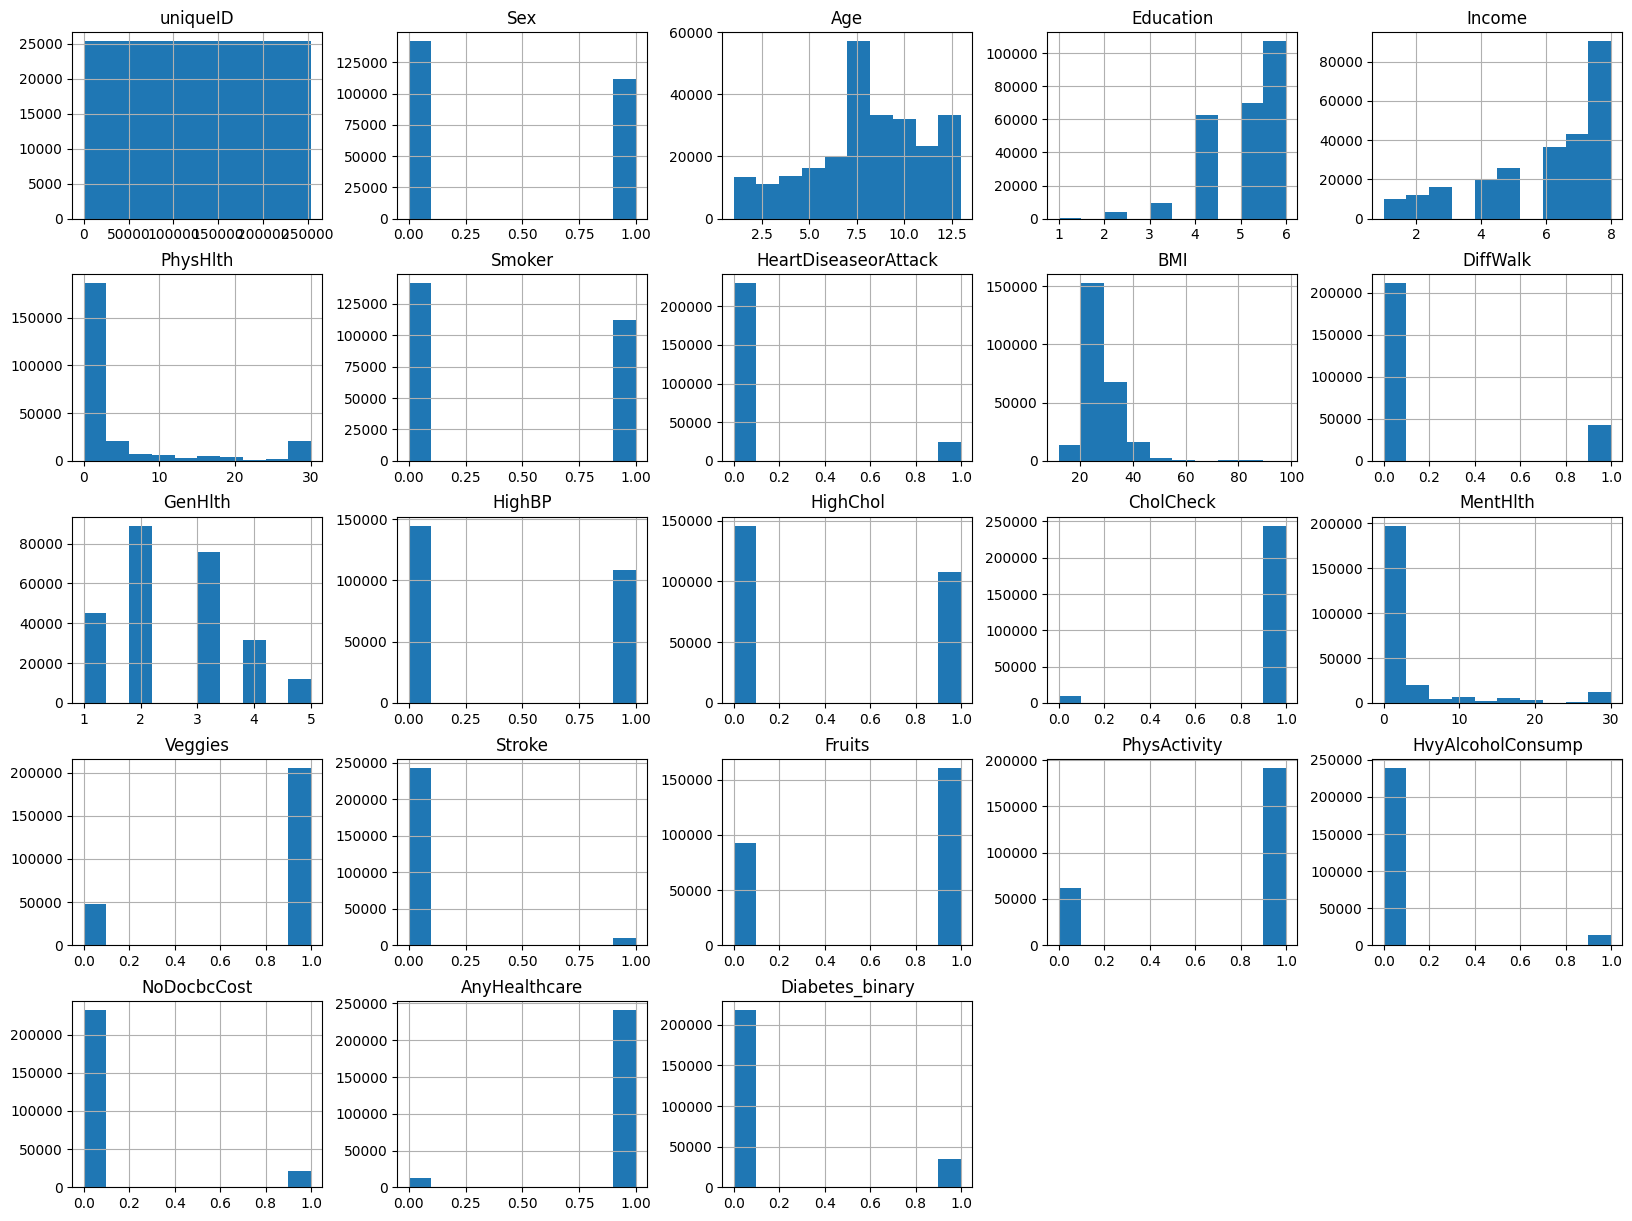

In [8]:
# Let's plot an histogram of our features in db_data
db_data.hist(figsize=(20,15));

## **Summary of Distribution Analysis:**

This analysis shows certain metrics that may prove to have correlations to those with or without diabetes. This is decided by how drastic the distribution is towards one binary response or not. In other words, if the majority of participants answered in favor of one binary ("Yes" or "No"), then more likely it could not be distinguished whether the metric was more predictive of the participant also having diabetes, as those without diabetes also selected the same option. The columns not to be included in analysis due to this lack of statistical significance are: physical_health, cholesterol_check, mental_health, stroke, heavy_alcohol_consump, no_doctor_bc_cost, any_healthcare. The remaining columns will be further analyzed for correlations to Diabetes Binary to determine whether they are predictive.

## **Data Cleaning Steps**:

- No null or missing values
- Outliers Detection/Removal: As the data is categorical, with the exception of BMI, Mental, and Physical Health, there was not a need for outlier detection as the latter 2 columns will be dropped. 
- Rename columns to use lowercase and underscores for spacing and readability
- Drop excess columns not to be included in analysis due to lack of statistical significance:
	-physical_health, cholesterol_check, mental_health, stroke, heavy_alcohol_consump, no_doctor_bc_cost, any_healthcare
- Column datatypes: While working with the data, categorical columns will be converted, as needed
	- All 0/1 values to 'No' or 'Yes' for specified columns
	- sex, age, education, income: convert from numeric to category names
- Make age, education, and income ordinal categories

In [9]:
#Make a copy of the dataframe to clean

clean_db_data = db_data.copy()

In [10]:
rename_dict = {'uniqueID':'unique_id',
            'Sex':'sex',
            'Age':'age',
            'Education':'education',
            'Income':'income',
            'PhysHlth':'physical_health',
            'Smoker':'smoker',
            'HeartDiseaseorAttack':'heart_disease_or_attack',
            'BMI':'bmi',
            'DiffWalk':'difficulty_walking',
            'GenHlth':'general_health',
            'HighBP':'high_blood_pressure',
            'HighChol':'high_cholesterol',
            'CholCheck':'cholesterol_check',
            'MentHlth':'mental_health',
            'Veggies':'veggies',
            'Stroke':'stroke',
            'Fruits':'fruits',
            'PhysActivity':'physical_activity',
            'HvyAlcoholConsump':'heavy_alcohol_consump',
            'NoDocbcCost':'no_doctor_bc_cost',
            'AnyHealthcare':'any_healthcare',
            'Diabetes_binary':'diabetes_binary'
              }

#pass in the dictionary to rename the columns
clean_db_data = clean_db_data.rename(columns=rename_dict)

#let's do a quick check to ensure desired columns names have updated
clean_db_data.head()

,unique_id,sex,age,education,income,physical_health,smoker,heart_disease_or_attack,bmi,difficulty_walking,general_health,high_blood_pressure,high_cholesterol,cholesterol_check,mental_health,veggies,stroke,fruits,physical_activity,heavy_alcohol_consump,no_doctor_bc_cost,any_healthcare,diabetes_binary
0,0,0,9,4,3,15,1,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,0.0
1,1,0,7,6,1,0,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0.0
2,2,0,9,4,8,30,0,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,0.0
3,3,0,11,3,6,0,0,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0.0
4,4,0,11,5,4,0,0,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0.0


In [11]:
#Drop columns due to lack of statistical significance: physical_health, cholesterol_check, mental_health, veggies, stroke, heavy_alcohol_consump, no_doctor_bc_cost, any_healthcare

clean_db_data = clean_db_data.drop(['physical_health', 'cholesterol_check', 'mental_health','stroke', 'heavy_alcohol_consump', 'no_doctor_bc_cost', 'any_healthcare'], axis=1)

clean_db_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   unique_id                253680 non-null  int64  
 1   sex                      253680 non-null  int64  
 2   age                      253680 non-null  int64  
 3   education                253680 non-null  int64  
 4   income                   253680 non-null  int64  
 5   smoker                   253680 non-null  int64  
 6   heart_disease_or_attack  253680 non-null  int64  
 7   bmi                      253680 non-null  int64  
 8   difficulty_walking       253680 non-null  int64  
 9   general_health           253680 non-null  int64  
 10  high_blood_pressure      253680 non-null  int64  
 11  high_cholesterol         253680 non-null  int64  
 12  veggies                  253680 non-null  int64  
 13  fruits                   253680 non-null  int64  
 14  phys

In [12]:
#Change category names for values if 0/1 to No/Yes

#First, create a dictionary that uses the numeric categories as keys and names of categories as values
yes_or_no_dict = {
    0: 'No',
    1: 'Yes'
}

# List of columns to replace 0/1 values
cols_to_replace = ['smoker', 'heart_disease_or_attack', 'difficulty_walking', 'high_blood_pressure', 'high_cholesterol', 'veggies', 'fruits', 'physical_activity']

# Iterate over the selected columns in the dataframe
for col in cols_to_replace:
    # Replace values in the current column based on the dictionary
    clean_db_data[col] = clean_db_data[col].apply(lambda x: yes_or_no_dict[x])

# Resulting dataframe
clean_db_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   unique_id                253680 non-null  int64  
 1   sex                      253680 non-null  int64  
 2   age                      253680 non-null  int64  
 3   education                253680 non-null  int64  
 4   income                   253680 non-null  int64  
 5   smoker                   253680 non-null  object 
 6   heart_disease_or_attack  253680 non-null  object 
 7   bmi                      253680 non-null  int64  
 8   difficulty_walking       253680 non-null  object 
 9   general_health           253680 non-null  int64  
 10  high_blood_pressure      253680 non-null  object 
 11  high_cholesterol         253680 non-null  object 
 12  veggies                  253680 non-null  object 
 13  fruits                   253680 non-null  object 
 14  phys

In [13]:
#Adjust sex category names, convert to categorical datatype
sex_category_names = {
    0:'Female',
    1:'Male'
}

clean_db_data['sex'] = clean_db_data['sex'].apply(lambda x: sex_category_names[x])
clean_db_data['sex'] = clean_db_data['sex'].astype("category")

clean_db_data.head()

,unique_id,sex,age,education,income,smoker,heart_disease_or_attack,bmi,difficulty_walking,general_health,high_blood_pressure,high_cholesterol,veggies,fruits,physical_activity,diabetes_binary
0,0,Female,9,4,3,Yes,No,40,Yes,5,Yes,Yes,Yes,No,No,0.0
1,1,Female,7,6,1,Yes,No,25,No,3,No,No,No,No,Yes,0.0
2,2,Female,9,4,8,No,No,28,Yes,5,Yes,Yes,No,Yes,No,0.0
3,3,Female,11,3,6,No,No,27,No,2,Yes,No,Yes,Yes,Yes,0.0
4,4,Female,11,5,4,No,No,24,No,2,Yes,Yes,Yes,Yes,Yes,0.0


In [14]:
#Adjust category names for age
age_category_names = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80-99',
    14: 'Missing'
}


#Can use the apply() method on the age column to apply a lambda function to each value in that column. 
#The lambda function takes in a value x, and returns the value at index x in the age_category_names list.
#So, for each value in the age column, this code is getting the corresponding value in the age_category_names dictionary

clean_db_data['age'] = clean_db_data['age'].apply(lambda x: age_category_names[x])

clean_db_data.head()

,unique_id,sex,age,education,income,smoker,heart_disease_or_attack,bmi,difficulty_walking,general_health,high_blood_pressure,high_cholesterol,veggies,fruits,physical_activity,diabetes_binary
0,0,Female,60-64,4,3,Yes,No,40,Yes,5,Yes,Yes,Yes,No,No,0.0
1,1,Female,50-54,6,1,Yes,No,25,No,3,No,No,No,No,Yes,0.0
2,2,Female,60-64,4,8,No,No,28,Yes,5,Yes,Yes,No,Yes,No,0.0
3,3,Female,70-74,3,6,No,No,27,No,2,Yes,No,Yes,Yes,Yes,0.0
4,4,Female,70-74,5,4,No,No,24,No,2,Yes,Yes,Yes,Yes,Yes,0.0


In [15]:
#Adjust education category names
edu_category_names = {
    1: 'Did not graduate high school',
    2: 'Did not graduate high school',
    3: 'Did not graduate high school',
    4: 'Graduated high school',
    5: 'Attended college or technical school',
    6: 'Graduated college or technical school',
    9: 'Missing'
}

clean_db_data['education'] = clean_db_data['education'].apply(lambda x: edu_category_names[x])

clean_db_data.head()

,unique_id,sex,age,education,income,smoker,heart_disease_or_attack,bmi,difficulty_walking,general_health,high_blood_pressure,high_cholesterol,veggies,fruits,physical_activity,diabetes_binary
0,0,Female,60-64,Graduated high school,3,Yes,No,40,Yes,5,Yes,Yes,Yes,No,No,0.0
1,1,Female,50-54,Graduated college or technical school,1,Yes,No,25,No,3,No,No,No,No,Yes,0.0
2,2,Female,60-64,Graduated high school,8,No,No,28,Yes,5,Yes,Yes,No,Yes,No,0.0
3,3,Female,70-74,Did not graduate high school,6,No,No,27,No,2,Yes,No,Yes,Yes,Yes,0.0
4,4,Female,70-74,Attended college or technical school,4,No,No,24,No,2,Yes,Yes,Yes,Yes,Yes,0.0


In [16]:
#Adjust income category names
inc_category_names = {
    1: 'Less than $15,000',
    2: 'Less than $15,000',
    3: '$15,000-25,000',
    4: '$15,000-25,000',
    5: '$25,000-35,000',
    6: '$35,000-50,000',
    7: 'Greater than $50,000',
    8: 'Greater than $50,000',
    9: 'Missing'
}

clean_db_data['income'] = clean_db_data['income'].apply(lambda x: inc_category_names[x])

clean_db_data.head()

,unique_id,sex,age,education,income,smoker,heart_disease_or_attack,bmi,difficulty_walking,general_health,high_blood_pressure,high_cholesterol,veggies,fruits,physical_activity,diabetes_binary
0,0,Female,60-64,Graduated high school,"$15,000-25,000",Yes,No,40,Yes,5,Yes,Yes,Yes,No,No,0.0
1,1,Female,50-54,Graduated college or technical school,"Less than $15,000",Yes,No,25,No,3,No,No,No,No,Yes,0.0
2,2,Female,60-64,Graduated high school,"Greater than $50,000",No,No,28,Yes,5,Yes,Yes,No,Yes,No,0.0
3,3,Female,70-74,Did not graduate high school,"$35,000-50,000",No,No,27,No,2,Yes,No,Yes,Yes,Yes,0.0
4,4,Female,70-74,Attended college or technical school,"$15,000-25,000",No,No,24,No,2,Yes,Yes,Yes,Yes,Yes,0.0


In [17]:
# convert age, education, income into ordered categorical types
ordinal_var_dict = {
    'age': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-99', 'Missing'],
    'education' : ['Did not graduate high school', 'Graduated high school', 'Attended college or technical school', 'Graduated college or technical school', 'Missing'],
    'income' : ['Less than $15,000', '$15,000-25,000', '$25,000-35,000', '$35,000-50,000', 'Greater than $50,000', 'Missing']
}

# set and order categories in columns

for col in ordinal_var_dict:
    clean_db_data[col] = clean_db_data[col].astype("category")
    clean_db_data[col] = clean_db_data[col].cat.set_categories(
        ordinal_var_dict[col], ordered=True
    )

In [18]:
#Confirm the column categories are ordered
#clean_db_data.age.values
#clean_db_data.education.values
clean_db_data.income.values

['$15,000-25,000', 'Less than $15,000', 'Greater than $50,000', '$35,000-50,000', '$15,000-25,000', ..., 'Greater than $50,000', '$15,000-25,000', 'Less than $15,000', 'Less than $15,000', 'Less than $15,000']
Length: 253680
Categories (6, object): ['Less than $15,000' < '$15,000-25,000' < '$25,000-35,000' < '$35,000-50,000' < 'Greater than $50,000' < 'Missing']

In [19]:
clean_db_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   unique_id                253680 non-null  int64   
 1   sex                      253680 non-null  category
 2   age                      253680 non-null  category
 3   education                253680 non-null  category
 4   income                   253680 non-null  category
 5   smoker                   253680 non-null  object  
 6   heart_disease_or_attack  253680 non-null  object  
 7   bmi                      253680 non-null  int64   
 8   difficulty_walking       253680 non-null  object  
 9   general_health           253680 non-null  int64   
 10  high_blood_pressure      253680 non-null  object  
 11  high_cholesterol         253680 non-null  object  
 12  veggies                  253680 non-null  object  
 13  fruits                   253680 non-null  ob

## **Distribution Analysis for each of the remaining columns in the dataset**

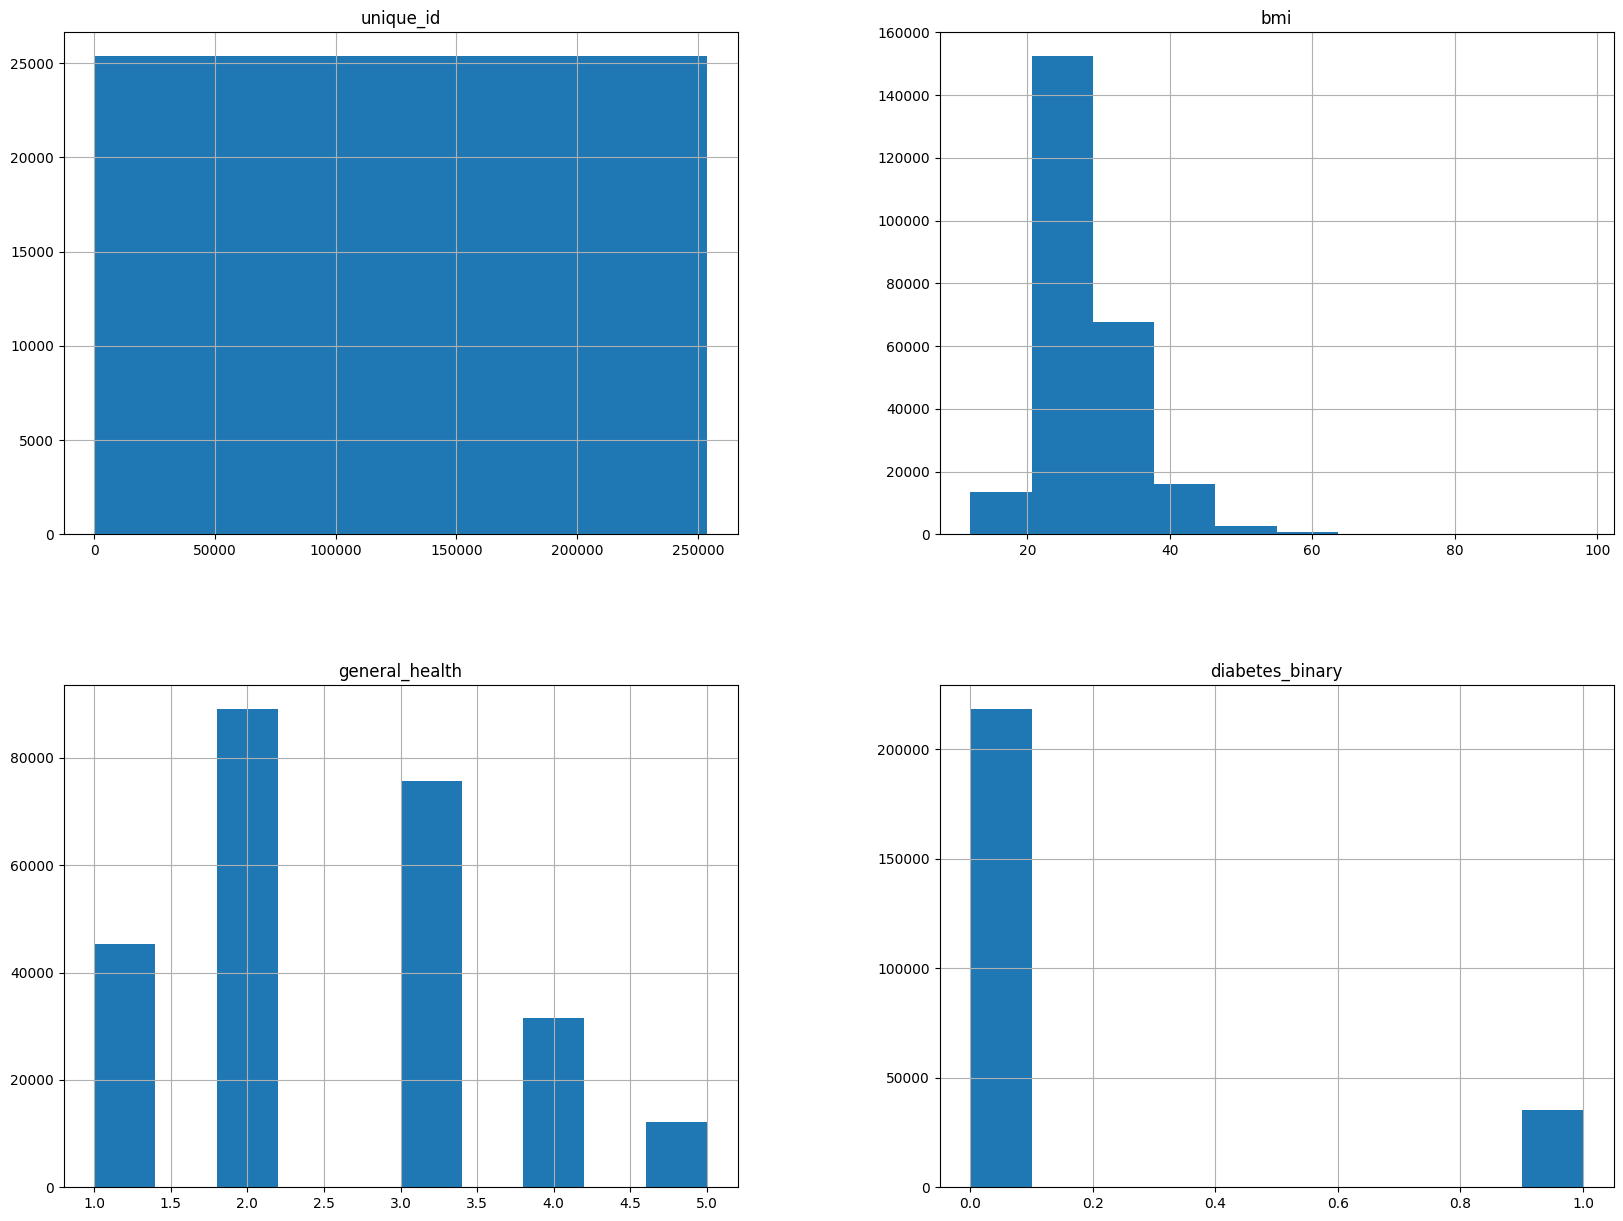

In [182]:
clean_db_data.hist(figsize=(20,15));

In [183]:
clean_db_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   unique_id                253680 non-null  int64   
 1   sex                      253680 non-null  category
 2   age                      253680 non-null  category
 3   education                253680 non-null  category
 4   income                   253680 non-null  category
 5   smoker                   253680 non-null  object  
 6   heart_disease_or_attack  253680 non-null  object  
 7   bmi                      253680 non-null  int64   
 8   difficulty_walking       253680 non-null  object  
 9   general_health           253680 non-null  int64   
 10  high_blood_pressure      253680 non-null  object  
 11  high_cholesterol         253680 non-null  object  
 12  veggies                  253680 non-null  object  
 13  fruits                   253680 non-null  ob

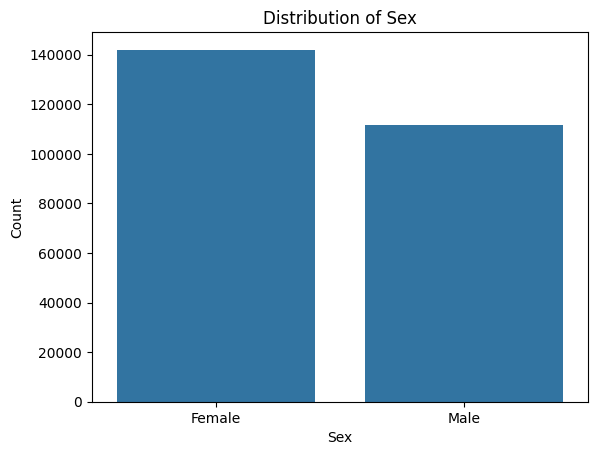

In [29]:
#After adjusting numerical values to string values, the .hist functionality will not plot them. We can replot these with seaborn to see univariate distributions of the variables: sex, age, education, income, smoker, heart_disease_or_attack, difficulty_walking, high_blood_pressure, high_cholesterol, fruits, physical_activity

#create a variable for the seaborn color argument
plot_color = sns.color_palette()[0]

#Distribution of sex
sns.countplot(data = clean_db_data, x = 'sex', color = plot_color).set(title='Distribution of Sex', xlabel = 'Sex', ylabel= 'Count');
#plt.xticks(rotation=90)


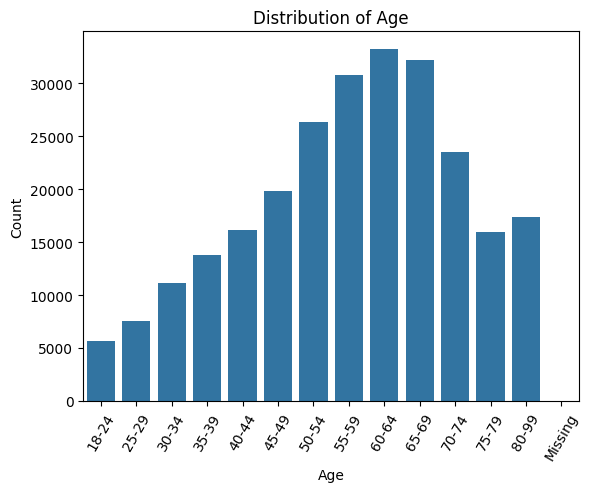

In [30]:
#Distribution of age
sns.countplot(data = clean_db_data, x = 'age', color = plot_color).set(title='Distribution of Age', xlabel = 'Age', ylabel= 'Count')
plt.xticks(rotation=60);

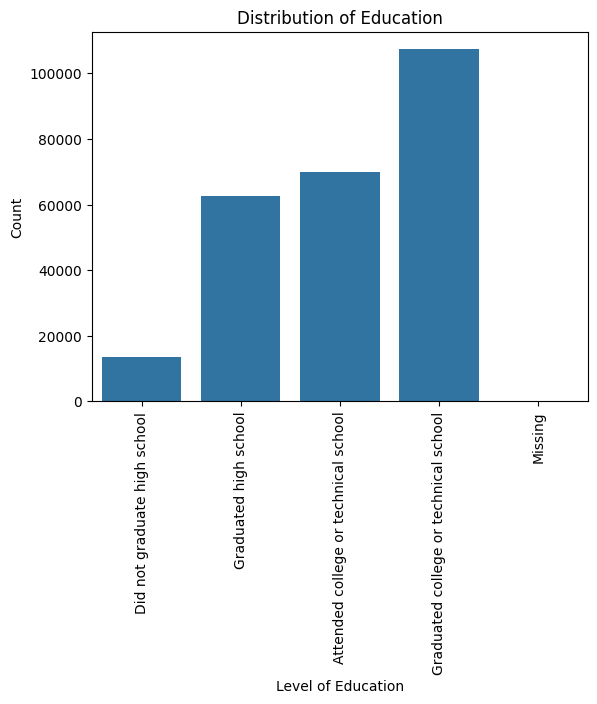

In [31]:
#Distribution of education
sns.countplot(data = clean_db_data, x = 'education', color = plot_color).set(title='Distribution of Education', xlabel = 'Level of Education', ylabel= 'Count')
plt.xticks(rotation=90);

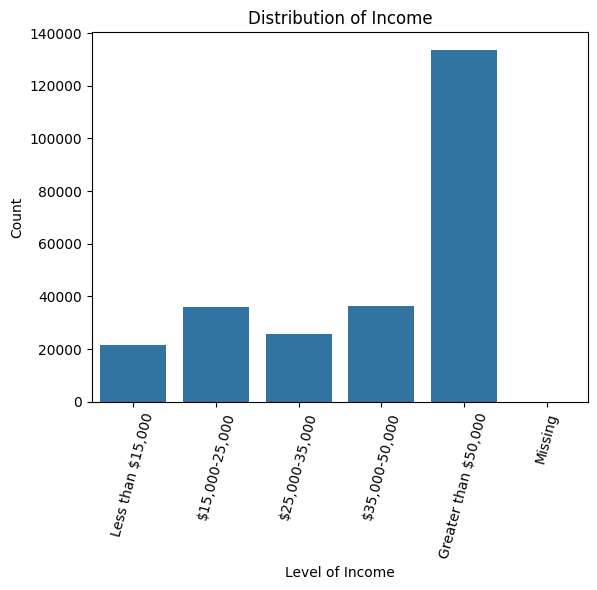

In [32]:
#Distribution of income
sns.countplot(data = clean_db_data, x = 'income', color = plot_color).set(title='Distribution of Income', xlabel = 'Level of Income', ylabel= 'Count')
plt.xticks(rotation=75);

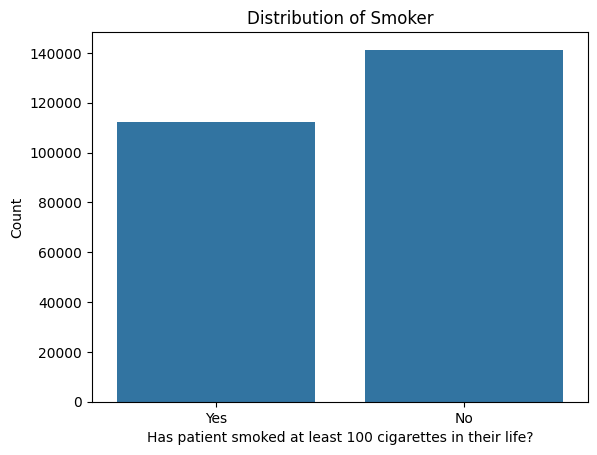

In [33]:
#Distribution of smoker
sns.countplot(data = clean_db_data, x = 'smoker', color = plot_color).set(title='Distribution of Smoker', xlabel = 'Has patient smoked at least 100 cigarettes in their life?', ylabel= 'Count');
#plt.xticks(rotation=90)

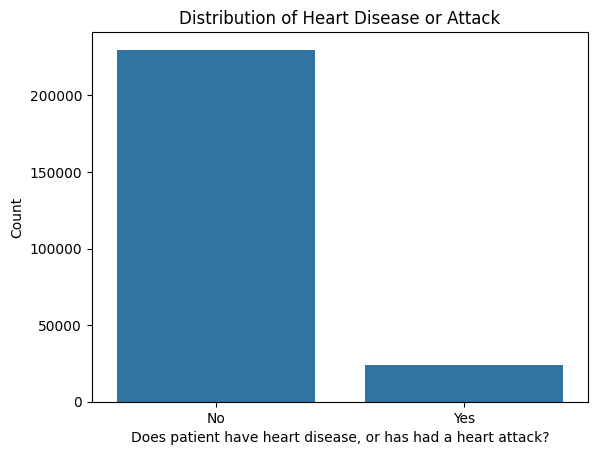

In [34]:
#Distribution of heart_disease_or_attack
sns.countplot(data = clean_db_data, x = 'heart_disease_or_attack', color = plot_color).set(title='Distribution of Heart Disease or Attack', xlabel = 'Does patient have heart disease, or has had a heart attack?', ylabel= 'Count');

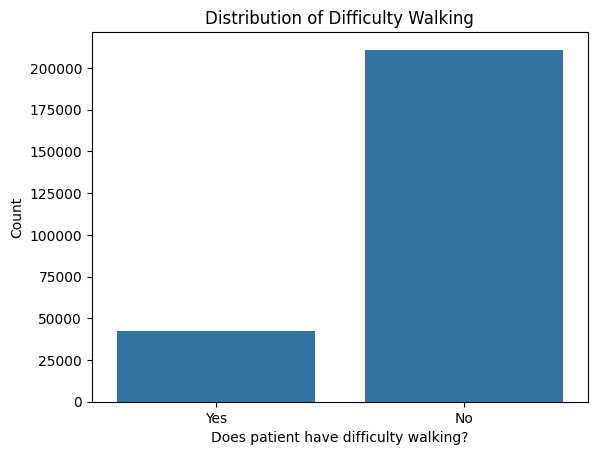

In [35]:
#Distribution of difficulty_walking
sns.countplot(data = clean_db_data, x = 'difficulty_walking', color = plot_color).set(title='Distribution of Difficulty Walking', xlabel = 'Does patient have difficulty walking?', ylabel= 'Count');

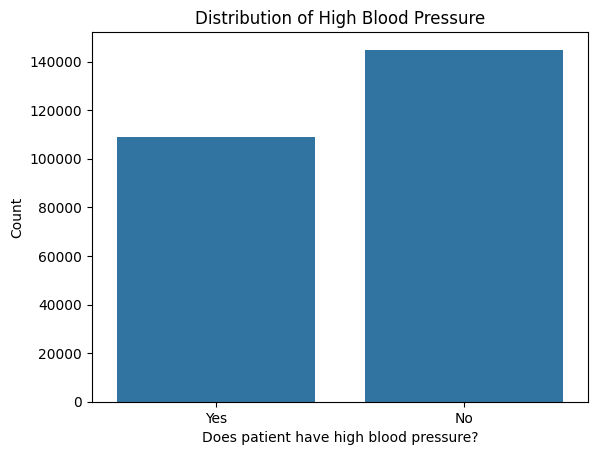

In [36]:
#Distribution of high_blood_pressure
sns.countplot(data = clean_db_data, x = 'high_blood_pressure', color = plot_color).set(title='Distribution of High Blood Pressure', xlabel = 'Does patient have high blood pressure?', ylabel= 'Count');

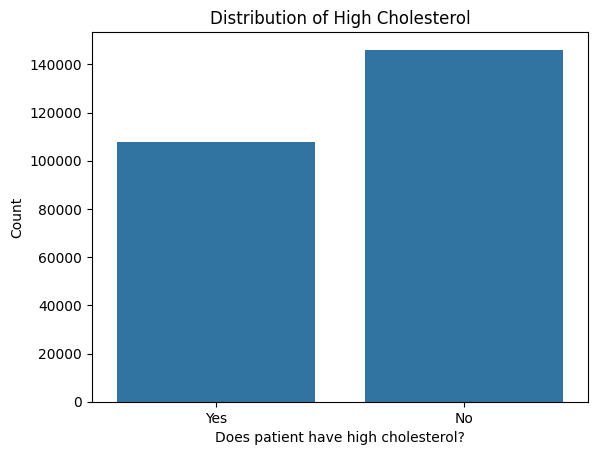

In [37]:
#Distribution of high_cholesterol
sns.countplot(data = clean_db_data, x = 'high_cholesterol', color = plot_color).set(title='Distribution of High Cholesterol', xlabel = 'Does patient have high cholesterol?', ylabel= 'Count');

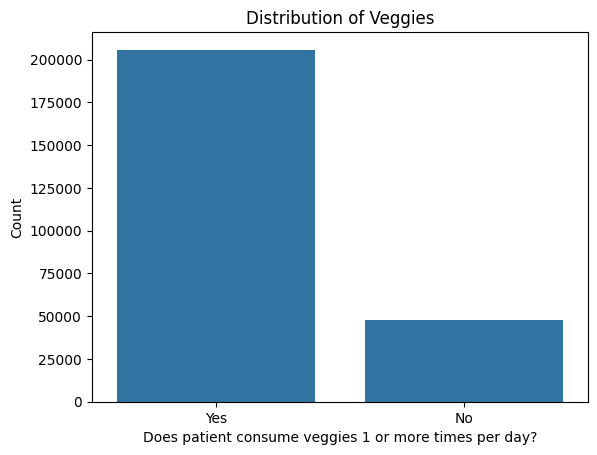

In [38]:
#Distribution of veggies
sns.countplot(data = clean_db_data, x = 'veggies', color = plot_color).set(title='Distribution of Veggies', xlabel = 'Does patient consume veggies 1 or more times per day?', ylabel= 'Count');

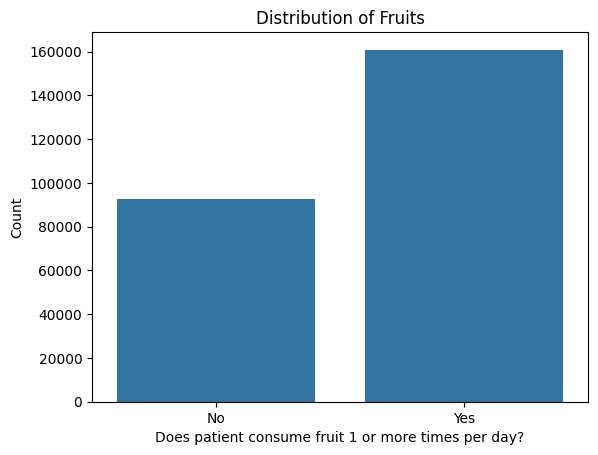

In [39]:
#Distribution of fruits
sns.countplot(data = clean_db_data, x = 'fruits', color = plot_color).set(title='Distribution of Fruits', xlabel = 'Does patient consume fruit 1 or more times per day?', ylabel= 'Count');

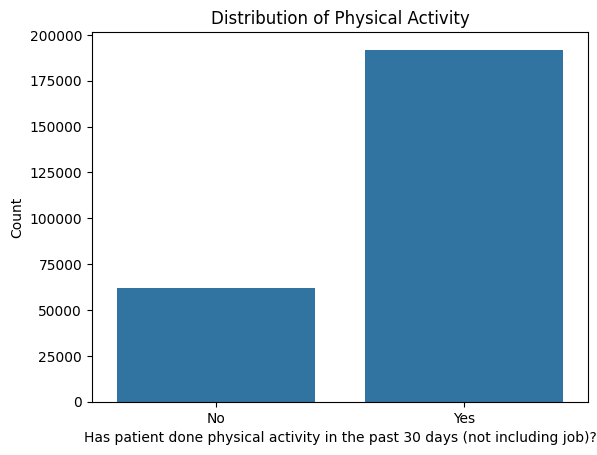

In [40]:
#Distribution of physical_activity
sns.countplot(data = clean_db_data, x = 'physical_activity', color = plot_color).set(title='Distribution of Physical Activity', xlabel = 'Has patient done physical activity in the past 30 days (not including job)?', ylabel= 'Count');

## **Summary of Observations during Univariate Analysis**:

-**BMI:** This shows a high peak in the 25-30 bin. As supported by the summary statistics, the mean for BMI is 28.4. This could show correlations to other health metrics such as physical activity and difficulty walking that were kept in for analysis.

-**General Health**: The majority of participants rated their general health as 2 or 3. While this could be interesting, this metric is highly subjective. It couls serve useful to see how the participant rates their health vs how other metrics reflect that rating, but this may not be aligned with the research goal, and will likely not be investigated for the sake of the current research goals.

-**Diabetes Binary:** The majority of participants, approx. 86%, do not have diabetes, but due to our research goal, the percentage of those with diabetes will be used as a point of reference to determine whether other variables are predictive of this subset of participants.

-**Sex:** There is an almost even distribution of sex in the dataset, with approximately 25,000 more female participants. 

-**Age:** This ditribution was slightly left skewed, with the top 3 age categories being those ranging from 55-69. Higher age ranges (Over 50) are expected to have more correlation with other predictive factors of diabetes, but this will be further investigated.

-**Education:** The majority of participants in the dataset were in the education category, "Graduated from college or technical school." Though, there could still be correlation to lower education levels and income, fruits/veggies, general health, or smoker metrics. While this could be interesting to see how these correlate with each other, in relation to predictive factors of diabetes, there is a much smaller sample of participants in these lowere categories, and may not have significant correlation.

-**Income:** The majority of data points fell into the "Greater than $50,000" income category. As with my thoughts about Education as a metric, this could be interesting to investigate for correlations with other financially driven metrics.

-**Smoker:** There were more participants that answered "No" to this question from the survey, but only by approximately 25,000. This metric will be investgated further for prdictiveness.

-**Heart Disease or Attack:** Surprisingly, and thankfully, the majority of those in this data did not have heart disease or a heart attack. Though, this health factor could still be considered for further analysis against metrics like smoker, high blood pressure, or high cholesterol for those with diabetes.

-**Difficulty Walking:** This metric also showed a distribution that widely favored "No," but as this factor is related to diabetes, it will be further investigated.

-**High Blood Pressure:** The distribution here showed in favor of "No" with approximately 140,000. Though, with so many participants having answered "Yes" (~100,000), this should be considered as a potential predictive risk factor.

-**High Cholesterol:** As with high blood pressure, the distribution here was similar, and this metirc should be further invesitigated for predictiveness of those with diabetes.

-**Veggies:** Approximately 200,000 participants answered that they do consume at least one vegetable a day. Likely, due to such majority, this will not be investigated further.

-**Fruit:** Not surprisingly, there was more participants that said "No" compared to the veggies metric. This could be due to the fact that those with diabetes have less options as to what fruit they can consume. This should be considered when investgating predictiveness. 

-**Physical Activity:** Approximately 200,000 answered that they have done physical activity in the past 30 days. This factor should be considered when investigating for correlation.

# **Cross-Correlation Analysis**

To keep aligned with our research goal, I will check variables against Diabetes Binary to see if there’s a relationship between them:
- Sex vs Diabetes Binary
- Age vs Diabetes Binary
- Education vs Diabetes Binary
- Income vs Diabetes Binary
- BMI vs Diabetes Binary
- Smoker vs Diabetes Binary
- Heart Disease vs Diabetes Binary
- High Blood Pressure vs Diabetes Binary
- High Cholesterol vs Diabetes Binary
- Veggies vs Diabetes Binary
- Fruits vs Diabetes Binary
- Physical Activity vs Diabetes Binary

**For this part of my analysis, these are the data questions I have and hope to find answers to:**

1. Does a higher age reflect stronger correlation to those with diabetes in the dataset?
2. Are (a) high blood pressure and (b) cholesterol consistent with having strong correlation to those with diabetes?
3. Which risk factor related to lifestyle choices (fruits, veggies, smoker, physical activity, difficulty walking) is most predictive of diabetes in this dataset?
4. What amount of those with diabetes have combined risk factors with more predictiveness/correlation?


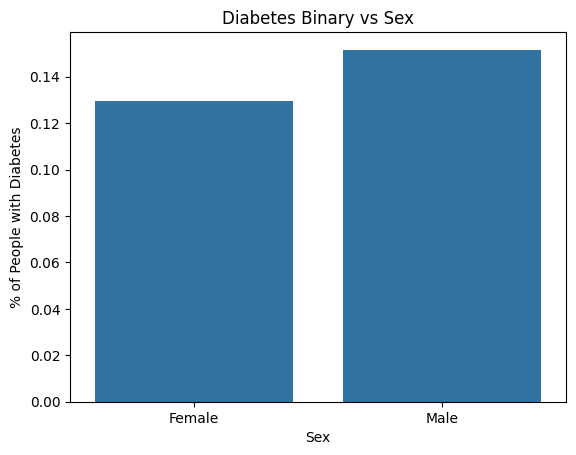

In [41]:
# Sex vs Diabetes Binary
db_diabetes_sex = clean_db_data[['diabetes_binary', 'sex']].groupby('sex').mean('diabetes_binary')

db_diabetes_sex = db_diabetes_sex.reset_index()


sns.barplot(data = db_diabetes_sex, x = 'sex', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Sex', xlabel='Sex', ylabel='% of People with Diabetes');

**Observation - Sex vs Diabetes:** Relative to females, there are a higher percentage of males with diabetes (13% vs 15%)

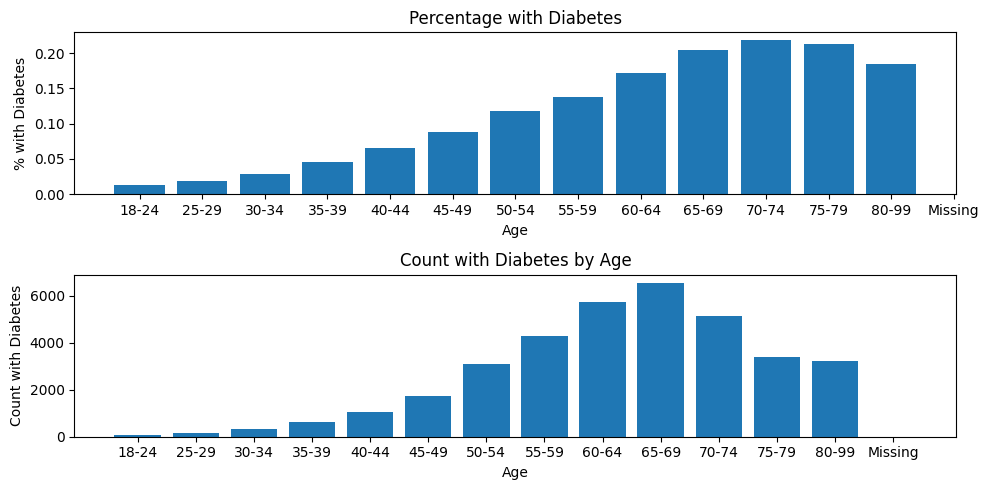

In [42]:
#Age vs Diabetes Binary

#subset of sum diabetes/age
sum_db_diabetes_age = clean_db_data[['diabetes_binary', 'age']].groupby('age').sum('diabetes_binary')

#subset of mean diabetes/age
mean_db_diabetes_age = clean_db_data[['diabetes_binary', 'age']].groupby('age').mean('diabetes_binary')

# Subplot with 2 subplots, arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# Plot the % with diabetes in the first subplot
ax1.bar(mean_db_diabetes_age.index, mean_db_diabetes_age['diabetes_binary'])
ax1.set_title('Percentage with Diabetes')
ax1.set_xlabel('Age')
ax1.set_ylabel('% with Diabetes')

# Plot the count with in the second subplot
ax2.bar(sum_db_diabetes_age.index, sum_db_diabetes_age['diabetes_binary'])
ax2.set_title('Count with Diabetes by Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count with Diabetes')

plt.tight_layout()
plt.show()

#mean_db_diabetes_age = mean_db_diabetes_age.reset_index()
# sns.barplot(data = db_diabetes_age, x = 'age', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Age', xlabel='Age', ylabel='% of People with Diabetes')
# plt.xticks(rotation = 60);

## **Answer to First Data Question:**

1. Does a higher age reflect stronger correlation to those with diabetes in the dataset?

- Yes: In both instances where we account for percentage and count, we see the graphs are left-skewed. This supports that there is a correlation between increasing age and those with diabetes. Age can be considered for the final subset of questions which will include those metrics which were most predictive of diabetes.

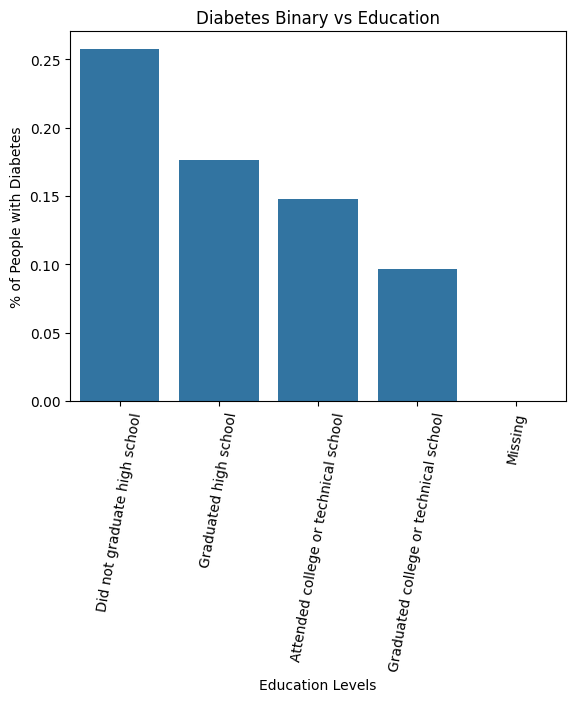

In [43]:
# Education vs Diabetes Binary

#subset of mean diabetes/edu
db_diabetes_edu = clean_db_data[['diabetes_binary', 'education']].groupby('education').mean('diabetes_binary')

db_diabetes_edu = db_diabetes_edu.reset_index()

#subset of sum diabetes/edu
# db_diabetes_edu = clean_db_data[['diabetes_binary', 'education']].groupby('education').sum('diabetes_binary')

# db_diabetes_edu = db_diabetes_edu.reset_index()

sns.barplot(data = db_diabetes_edu, x = 'education', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Education', xlabel='Education Levels', ylabel='% of People with Diabetes')
plt.xticks(rotation = 80);

In [44]:
db_diabetes_edu = clean_db_data[['diabetes_binary', 'education']].groupby('education').sum('diabetes_binary')

db_diabetes_edu = db_diabetes_edu.reset_index()

db_diabetes_edu

,education,diabetes_binary
0,Did not graduate high school,3526.0
1,Graduated high school,11066.0
2,Attended college or technical school,10354.0
3,Graduated college or technical school,10400.0
4,Missing,0.0


**Observation - Diabetes vs Education:** After inspecting both the count and percentages, the percentage showed 25% of people that did not graduate high school had diabetes from our dataset. Though, the count shows the least amount of participants with diabetes were in that category.

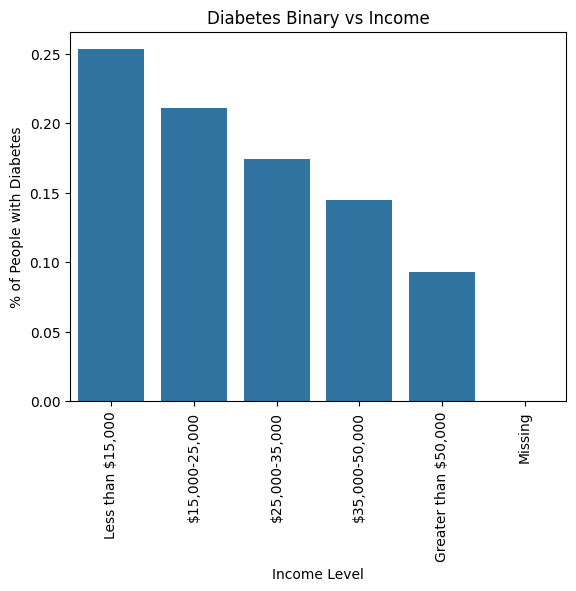

In [45]:
# Income vs Diabetes Binary
db_diabetes_inc = clean_db_data[['diabetes_binary', 'income']].groupby('income').mean('diabetes_binary')

db_diabetes_inc = db_diabetes_inc.reset_index()


sns.barplot(data = db_diabetes_inc, x = 'income', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Income', xlabel='Income Level', ylabel='% of People with Diabetes')
plt.xticks(rotation = 90);

In [46]:
db_diabetes_inc = clean_db_data[['diabetes_binary', 'income']].groupby('income').sum('diabetes_binary')

db_diabetes_inc = db_diabetes_inc.reset_index()

db_diabetes_inc

,income,diabetes_binary
0,"Less than $15,000",5469.0
1,"$15,000-25,000",7622.0
2,"$25,000-35,000",4504.0
3,"$35,000-50,000",5291.0
4,"Greater than $50,000",12460.0
5,Missing,0.0


**Observation - Diabetes vs Income:** The most amount of participants were in the top income category, but the trend of percentages shows an inverse relationship between increasing income ranges and decreasing percentage of those with diabetes.

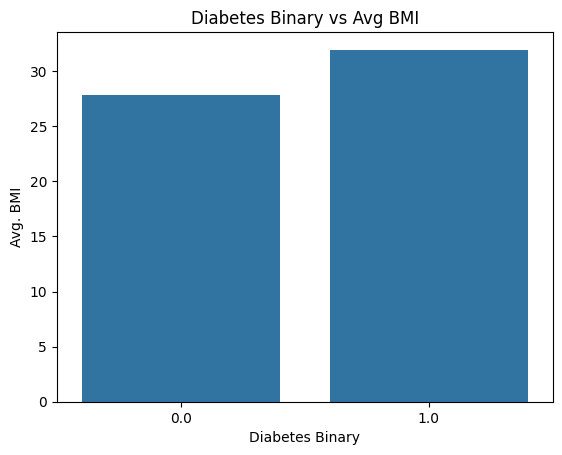

In [47]:
#Diabetes Binary vs BMI
db_diabetes_bmi = clean_db_data[['diabetes_binary', 'bmi']].groupby('diabetes_binary').mean('bmi')

db_diabetes_bmi = db_diabetes_bmi.reset_index()


sns.barplot(data = db_diabetes_bmi, x = 'diabetes_binary', y = 'bmi', color = plot_color).set(title='Diabetes Binary vs Avg BMI', xlabel='Diabetes Binary', ylabel='Avg. BMI');

In [48]:
db_diabetes_bmi

,diabetes_binary,bmi
0,0.0,27.805770
1,1.0,31.944011


**Observation - Diabetes vs BMI:** The average BMI for those with or without diabetes is higher that the upper healthy bmi limit of 25. Though, it is important to note that those with diabetes had a higher average bmi than those without diabetes by about 4. 

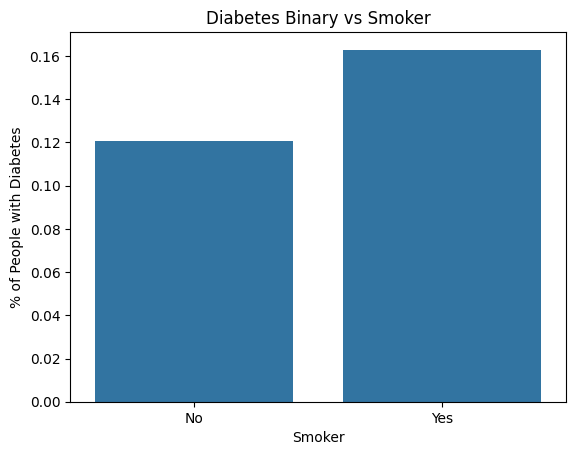

In [49]:
#Diabetes Binary vs Smoker
db_diabetes_smoker = clean_db_data[['diabetes_binary', 'smoker']].groupby('smoker').mean('diabetes_binary')

db_diabetes_smoker = db_diabetes_smoker.reset_index()


sns.barplot(data = db_diabetes_smoker, x = 'smoker', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Smoker', xlabel='Smoker', ylabel='% of People with Diabetes');

In [50]:
db_diabetes_smoker = clean_db_data[['diabetes_binary', 'smoker']].groupby('smoker').sum('diabetes_binary')

db_diabetes_smoker = db_diabetes_smoker.reset_index()

db_diabetes_smoker

,smoker,diabetes_binary
0,No,17029.0
1,Yes,18317.0


**Observation - Diabetes vs Smoker:** The counts of smokers who have diabetes is similar, but relative to those who are not diabetic, we see differences in the relative percentages (16% vs 12% respectively)

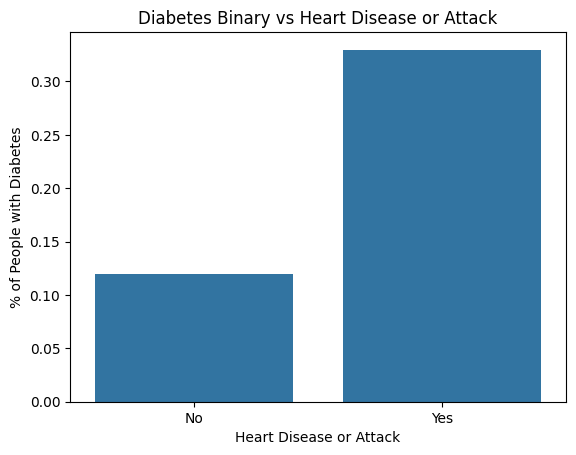

In [51]:
#Diabetes Binary vs Heart Disease 

db_diabetes_hd = clean_db_data[['diabetes_binary', 'heart_disease_or_attack']].groupby('heart_disease_or_attack').mean('diabetes_binary')

db_diabetes_hd = db_diabetes_hd.reset_index()


sns.barplot(data = db_diabetes_hd, x = 'heart_disease_or_attack', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Heart Disease or Attack', xlabel='Heart Disease or Attack', ylabel='% of People with Diabetes');

In [52]:
db_diabetes_hd = clean_db_data[['diabetes_binary', 'heart_disease_or_attack']].groupby('heart_disease_or_attack').sum('diabetes_binary')

db_diabetes_hd = db_diabetes_hd.reset_index()

db_diabetes_hd

,heart_disease_or_attack,diabetes_binary
0,No,27468.0
1,Yes,7878.0


**Observation - Diabetes vs Heart Diseases:** There was a much smaller subset of those with heart disease and diabetes. Though, relative to those without heart disease the percentage reflected a higher correlation. Due to a smaller count, this should be considered as to whether it may be somewhat misleading of predictiveness.

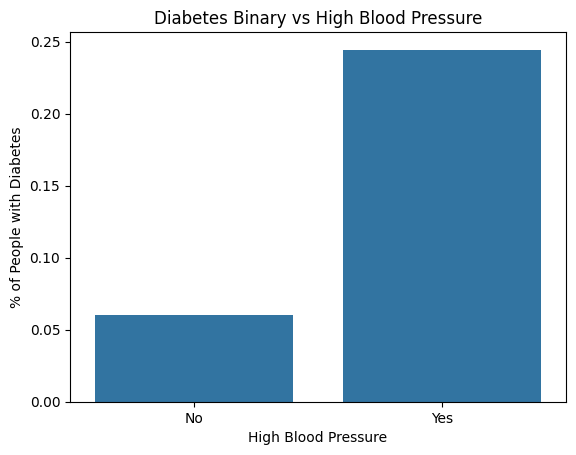

In [58]:
#Diabetes Binary vs High Blood Pressure

db_diabetes_bp = clean_db_data[['diabetes_binary', 'high_blood_pressure']].groupby('high_blood_pressure').mean('diabetes_binary')

db_diabetes_bp = db_diabetes_bp.reset_index()


sns.barplot(data = db_diabetes_bp, x = 'high_blood_pressure', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs High Blood Pressure', xlabel='High Blood Pressure', ylabel='% of People with Diabetes');

In [59]:
db_diabetes_bp

,high_blood_pressure,diabetes_binary
0,No,0.060352
1,Yes,0.244457


In [54]:
db_diabetes_bp = clean_db_data[['diabetes_binary', 'high_blood_pressure']].groupby('high_blood_pressure').sum('diabetes_binary')

db_diabetes_bp = db_diabetes_bp.reset_index()

db_diabetes_bp

,high_blood_pressure,diabetes_binary
0,No,8742.0
1,Yes,26604.0


**Observation - Diabetes vs High Blood Pressure AND Answer to data question 2a:
Are (a) high blood pressure and (b) cholesterol consistent with having strong correlation to those with diabetes?** 

The percentage and count both show strong correlation between high blood pressure and those with diabetes. Furthermore, of the 35,346 people with diabetes in the entire dataset, 26604 or 75.3%, have high blood pressure, supporting the fact that this metric is a top predictive factor.

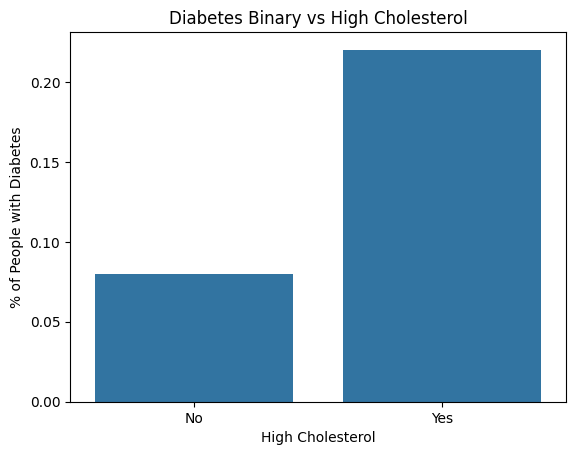

In [55]:
#Diabetes Binary vs High Cholesterol

db_diabetes_hc = clean_db_data[['diabetes_binary', 'high_cholesterol']].groupby('high_cholesterol').mean('diabetes_binary')

db_diabetes_hc = db_diabetes_hc.reset_index()


sns.barplot(data = db_diabetes_hc, x = 'high_cholesterol', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs High Cholesterol', xlabel='High Cholesterol', ylabel='% of People with Diabetes');

In [56]:
db_diabetes_hc 

,high_cholesterol,diabetes_binary
0,No,0.079814
1,Yes,0.220149


In [211]:
db_diabetes_hc = clean_db_data[['diabetes_binary', 'high_cholesterol']].groupby('high_cholesterol').sum('diabetes_binary')

db_diabetes_hc = db_diabetes_hc.reset_index()

db_diabetes_hc

,high_cholesterol,diabetes_binary
0,No,11660.0
1,Yes,23686.0


## Observation - Diabetes vs High Cholesterol AND Answer to data question 2b:
Are (a) high blood pressure and (b) cholesterol consistent with having strong correlation to those with diabetes?** 

The percentage and count both show strong correlation between high cholesterol and those with diabetes. Furthermore, of the 35,346 people with diabetes in the entire dataset, 23,686 or 67%, have high blood pressure, supporting the fact that this metric is a top predictive factor.

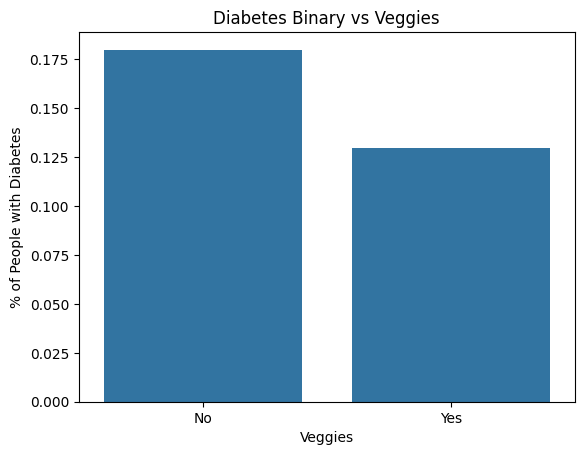

In [212]:
#Diabetes Binary vs Veggies

db_diabetes_veg = clean_db_data[['diabetes_binary', 'veggies']].groupby('veggies').mean('diabetes_binary')

db_diabetes_veg = db_diabetes_veg.reset_index()


sns.barplot(data = db_diabetes_veg, x = 'veggies', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Veggies', xlabel='Veggies', ylabel='% of People with Diabetes');

In [213]:
db_diabetes_veg = clean_db_data[['diabetes_binary', 'veggies']].groupby('veggies').sum('diabetes_binary')

db_diabetes_veg = db_diabetes_veg.reset_index()

db_diabetes_veg

,veggies,diabetes_binary
0,No,8610.0
1,Yes,26736.0


**END - Observation - Diabetes vs Veggies:** Although the count of those with diabetes who also consume one or more vegetables a day is the majority, this was also reflected in the distribution analysis. The majority of all participants had also consumed at least one or more vegetables a day. This means there is not much predictiveness in this metric.

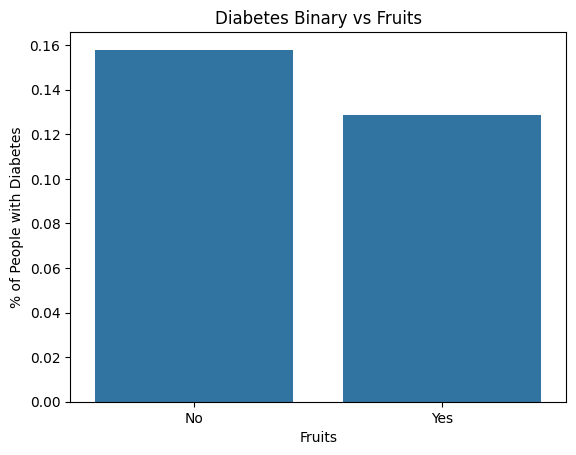

In [214]:
#Diabetes Binary vs Fruits

db_diabetes_fruits = clean_db_data[['diabetes_binary', 'fruits']].groupby('fruits').mean('diabetes_binary')

db_diabetes_fruits = db_diabetes_fruits.reset_index()


sns.barplot(data = db_diabetes_fruits, x = 'fruits', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Fruits', xlabel='Fruits', ylabel='% of People with Diabetes');

In [215]:
db_diabetes_fruits = clean_db_data[['diabetes_binary', 'fruits']].groupby('fruits').sum('diabetes_binary')

db_diabetes_fruits = db_diabetes_fruits.reset_index()

db_diabetes_fruits

,fruits,diabetes_binary
0,No,14653.0
1,Yes,20693.0


**END - Observation - Diabetes vs Fruits:** With most participants having consumed at least 1 fruit a day, this metric is also not particularly predictive. Something else to consider is about 16% of those that do not consume fruit have diabetes. This percent is not high enough to consider predictive for the context of this analysis. While 40% of those with diabetes do not eat fruit at least once a day, this could be due to the fact that the available safe fruit to eat is more limited. This would have to be taken into account if establishing predicitveness. Which fruit are available to diabetics? What is the average cost of those? How accessible are those compared to other fruits that may not be safe to eat? There is not data to answer these and therefore, this metric will not be further explored, but could be further investigated with another metric for the data. 

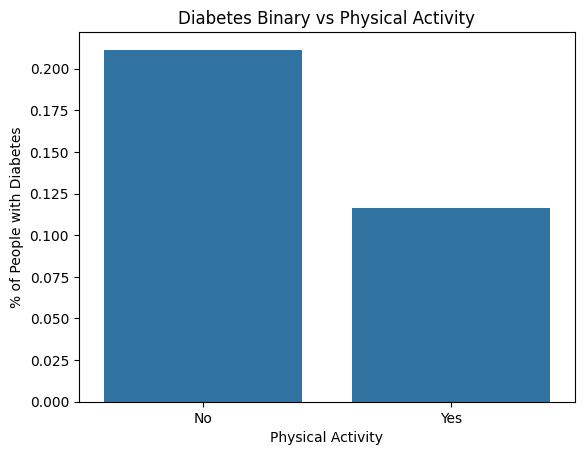

In [216]:
#Diabetes Binary vs Physical Activity

db_diabetes_pa = clean_db_data[['diabetes_binary', 'physical_activity']].groupby('physical_activity').mean('diabetes_binary')

db_diabetes_pa = db_diabetes_pa.reset_index()


sns.barplot(data = db_diabetes_pa, x = 'physical_activity', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Physical Activity', xlabel='Physical Activity', ylabel='% of People with Diabetes');

In [217]:
db_diabetes_pa = clean_db_data[['diabetes_binary', 'physical_activity']].groupby('physical_activity').sum('diabetes_binary')

db_diabetes_pa = db_diabetes_pa.reset_index()

db_diabetes_pa

,physical_activity,diabetes_binary
0,No,13059.0
1,Yes,22287.0


**Observation - Diabetes vs Physical Activity:** Of those that have not done physical activity in the past 30 days, approximately 20% also have diabetes. This shows moderate predictiveness between this metric and diabetes and will be further investigated later in this analysis.

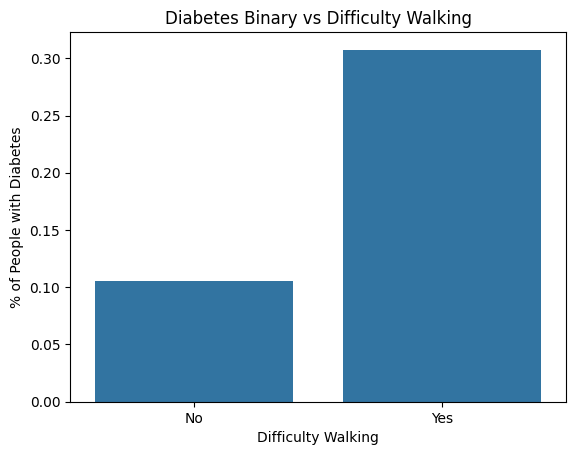

In [218]:
#Diabetes Binary vs Difficulty Walking

db_diabetes_dw = clean_db_data[['diabetes_binary', 'difficulty_walking']].groupby('difficulty_walking').mean('diabetes_binary')

db_diabetes_dw = db_diabetes_dw.reset_index()


sns.barplot(data = db_diabetes_dw, x = 'difficulty_walking', y = 'diabetes_binary', color = plot_color).set(title='Diabetes Binary vs Difficulty Walking', xlabel='Difficulty Walking', ylabel='% of People with Diabetes');

In [219]:
db_diabetes_dw = clean_db_data[['diabetes_binary', 'difficulty_walking']].groupby('difficulty_walking').sum('diabetes_binary')

db_diabetes_dw = db_diabetes_dw.reset_index()

db_diabetes_dw

,difficulty_walking,diabetes_binary
0,No,22225.0
1,Yes,13121.0


**Observation - Diabetes vs Difficulty Walking:** 

This percentage may be misleading in a way because this shows that 30% of people that had difficulty walking also have diabetes. Tohugh the total count of those who had difficulty walking in the dataset was about 40,000 out of over 250,000 participants. This smaller subset of data, while showing correlation, relative to the total data available may not be enough to support higher than moderate correlation. 

## **Answer to data question 3. Which risk factor related to lifestyle choices (fruits, veggies, smoker, physical activity, difficulty walking) is most predictive of diabetes in this dataset?**

Physical Activity was most predicitve. Relative to the total people that did not do physical activity in the past 30 days, we saw 20% of them had diabetes as well. The total that did not do physical activity accounted for a higher subset of participants, therefore making this metric more predicitve.

**Multivariate Exploration**

In [220]:
#Subset cleaned_db_data for: age, sex, diabetes binary, high bp

db_age_highbp_sex = clean_db_data[['diabetes_binary', 'age', 'high_blood_pressure', 'sex']].groupby(['age', 'sex', 'high_blood_pressure' ]).mean('diabetes_binary')

db_age_highbp_sex = db_age_highbp_sex.reset_index()

db_age_highbp_sex

,age,sex,high_blood_pressure,diabetes_binary
0,18-24,Female,No,0.013508
1,18-24,Female,Yes,0.064935
2,18-24,Male,No,0.008789
3,18-24,Male,Yes,0.029586
4,25-29,Female,No,0.017050
5,25-29,Female,Yes,0.087838
6,25-29,Male,No,0.009265
7,25-29,Male,Yes,0.039316
8,30-34,Female,No,0.021703
9,30-34,Female,Yes,0.110283


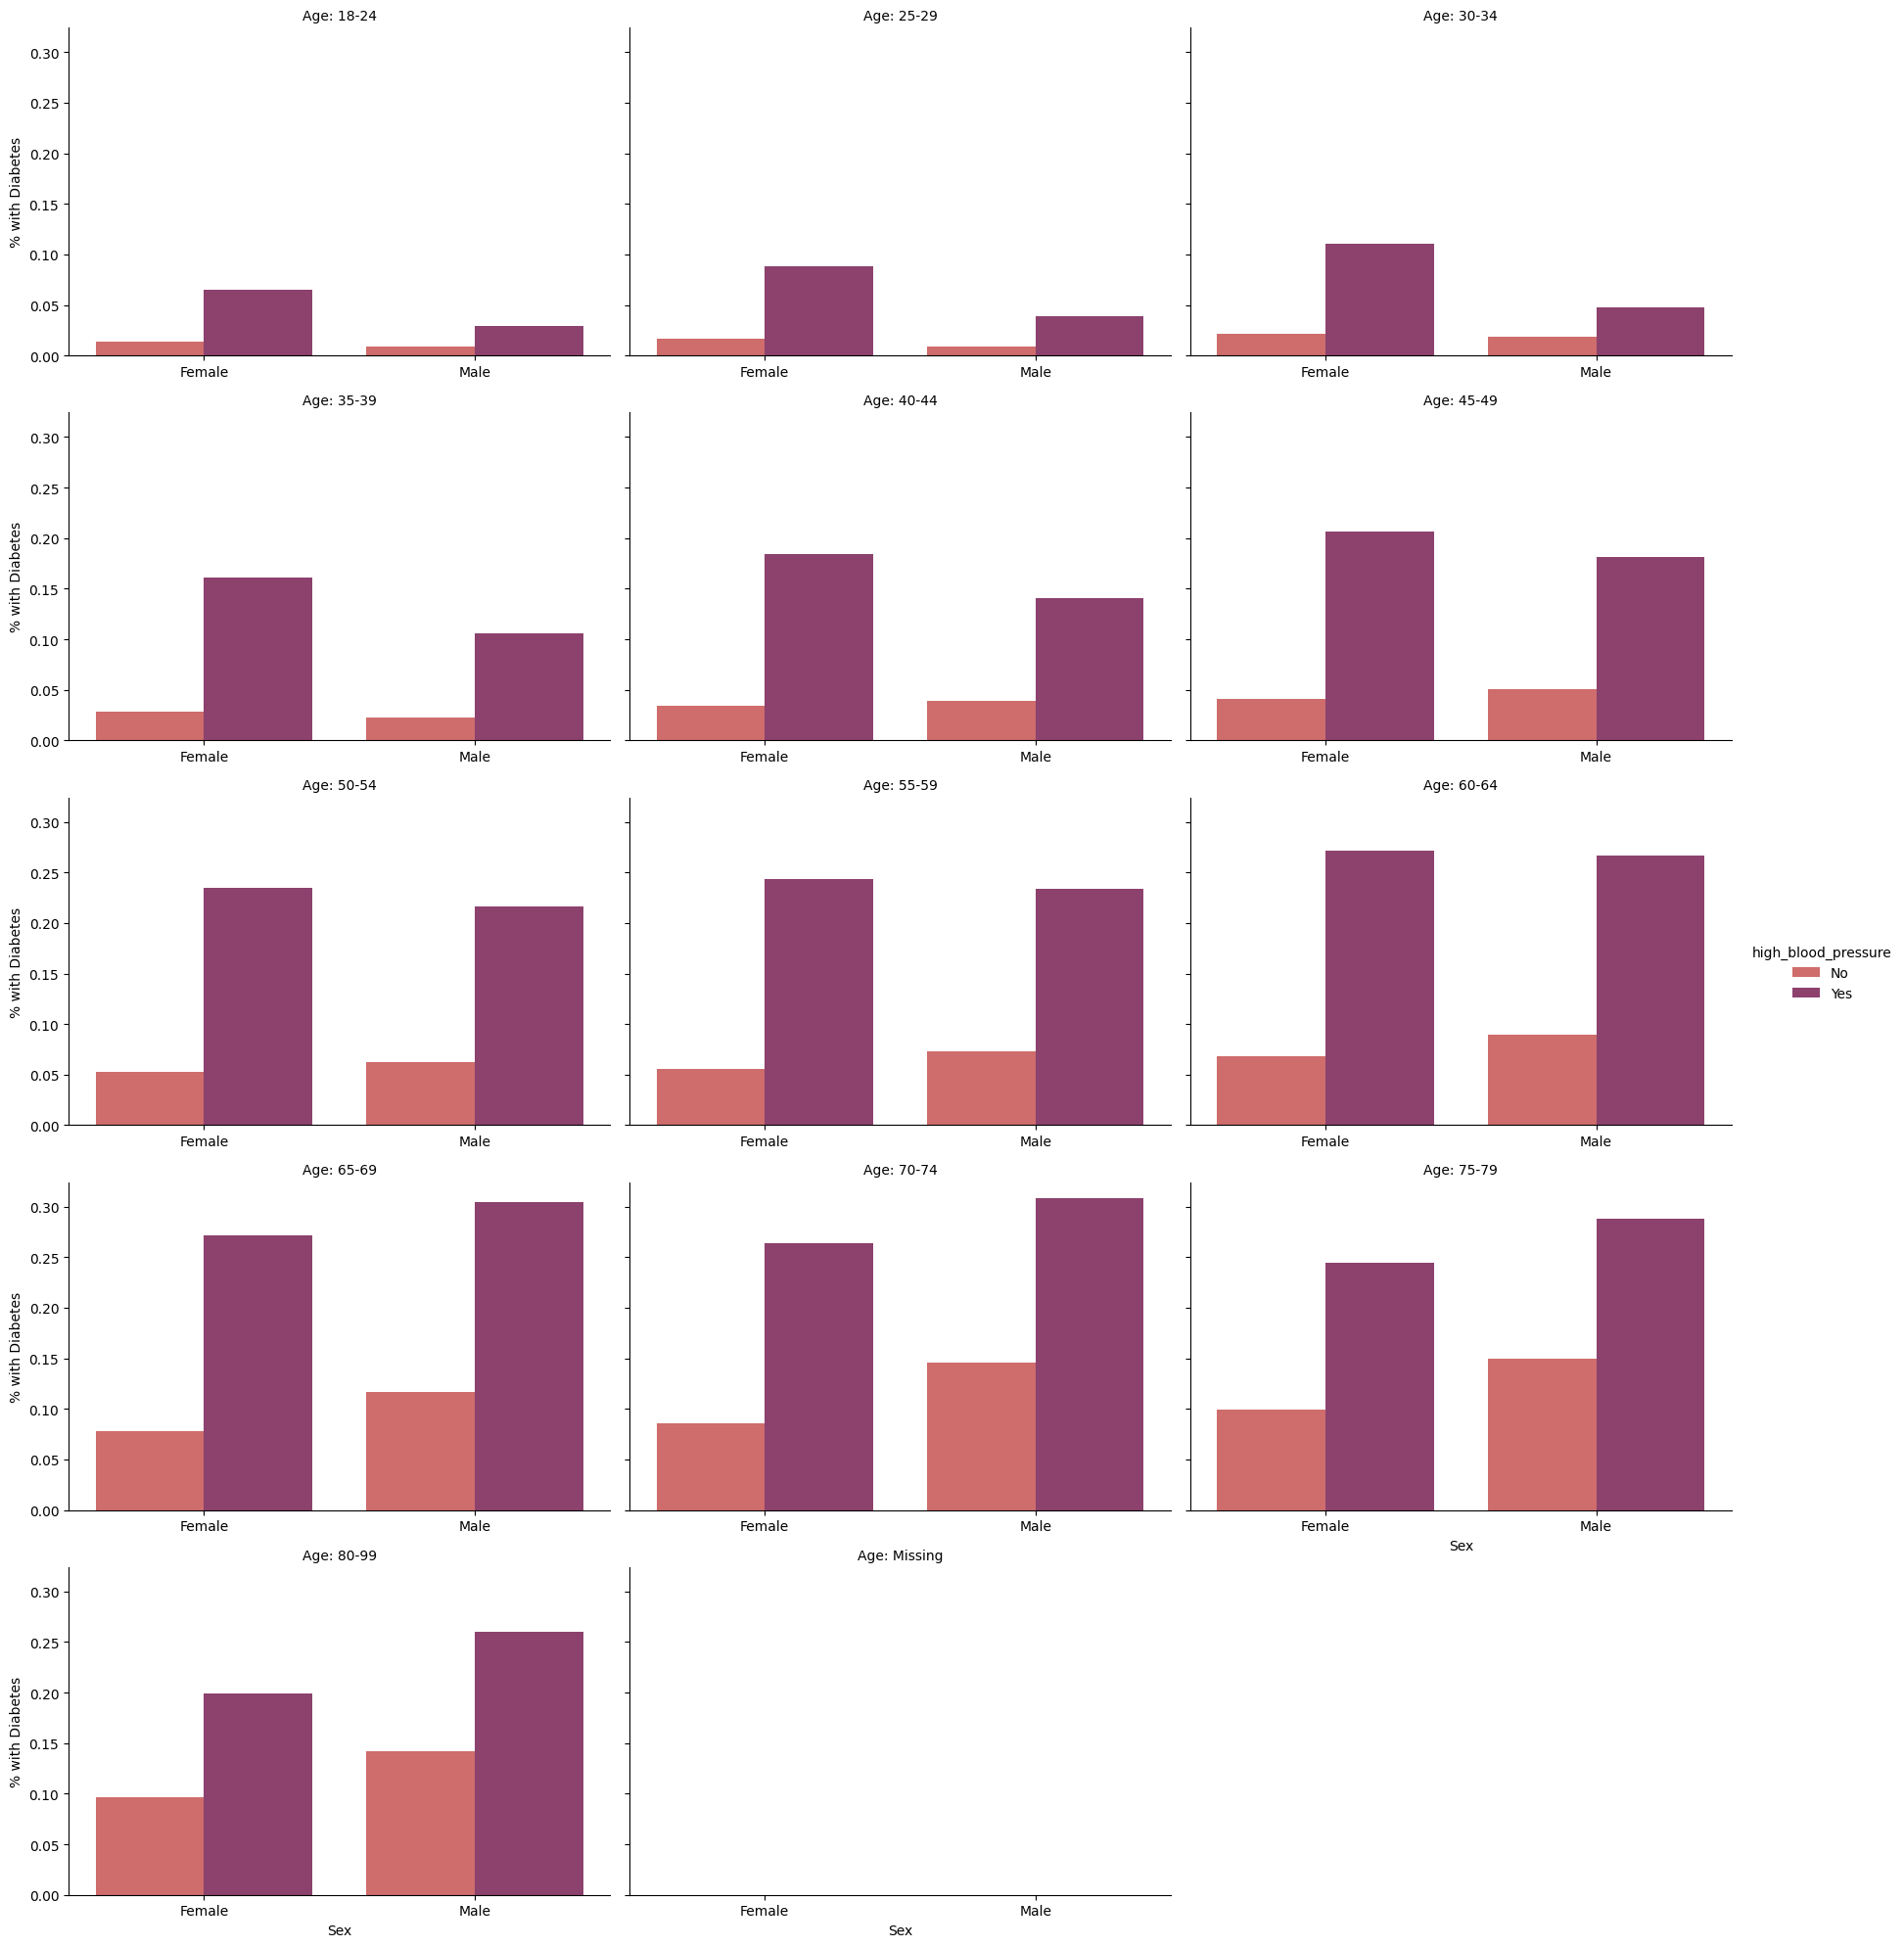

In [221]:
#Create sns.catplot() using age|high_blood_pressure|sex|diabetes_binary
g = sns.catplot(
        x= 'sex', 
        y='diabetes_binary', 
        data=db_age_highbp_sex,
        hue='high_blood_pressure',
        sharex=False,
        #sharey=False, #Including this parameter better shows the length of the error bars for further investigation, but can be misleading due to varied y-axis values
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='age',
        col_wrap=3
)


g.set_titles(template='Age: {col_name}')
g.set_ylabels(label='% with Diabetes')
g.set_xlabels(label='Sex'); 

In [222]:
#Subset cleaned_db_data for: age, sex, diabetes binary, high cholesterol

db_age_highch_sex = clean_db_data[['diabetes_binary', 'age', 'high_cholesterol', 'sex']].groupby(['age', 'sex', 'high_cholesterol' ]).mean('diabetes_binary')

db_age_highch_sex = db_age_highch_sex.reset_index()

db_age_highch_sex

,age,sex,high_cholesterol,diabetes_binary
0,18-24,Female,No,0.012068
1,18-24,Female,Yes,0.057915
2,18-24,Male,No,0.009218
3,18-24,Male,Yes,0.032922
4,25-29,Female,No,0.016838
5,25-29,Female,Yes,0.061602
6,25-29,Male,No,0.008596
7,25-29,Male,Yes,0.051502
8,30-34,Female,No,0.021018
9,30-34,Female,Yes,0.093607


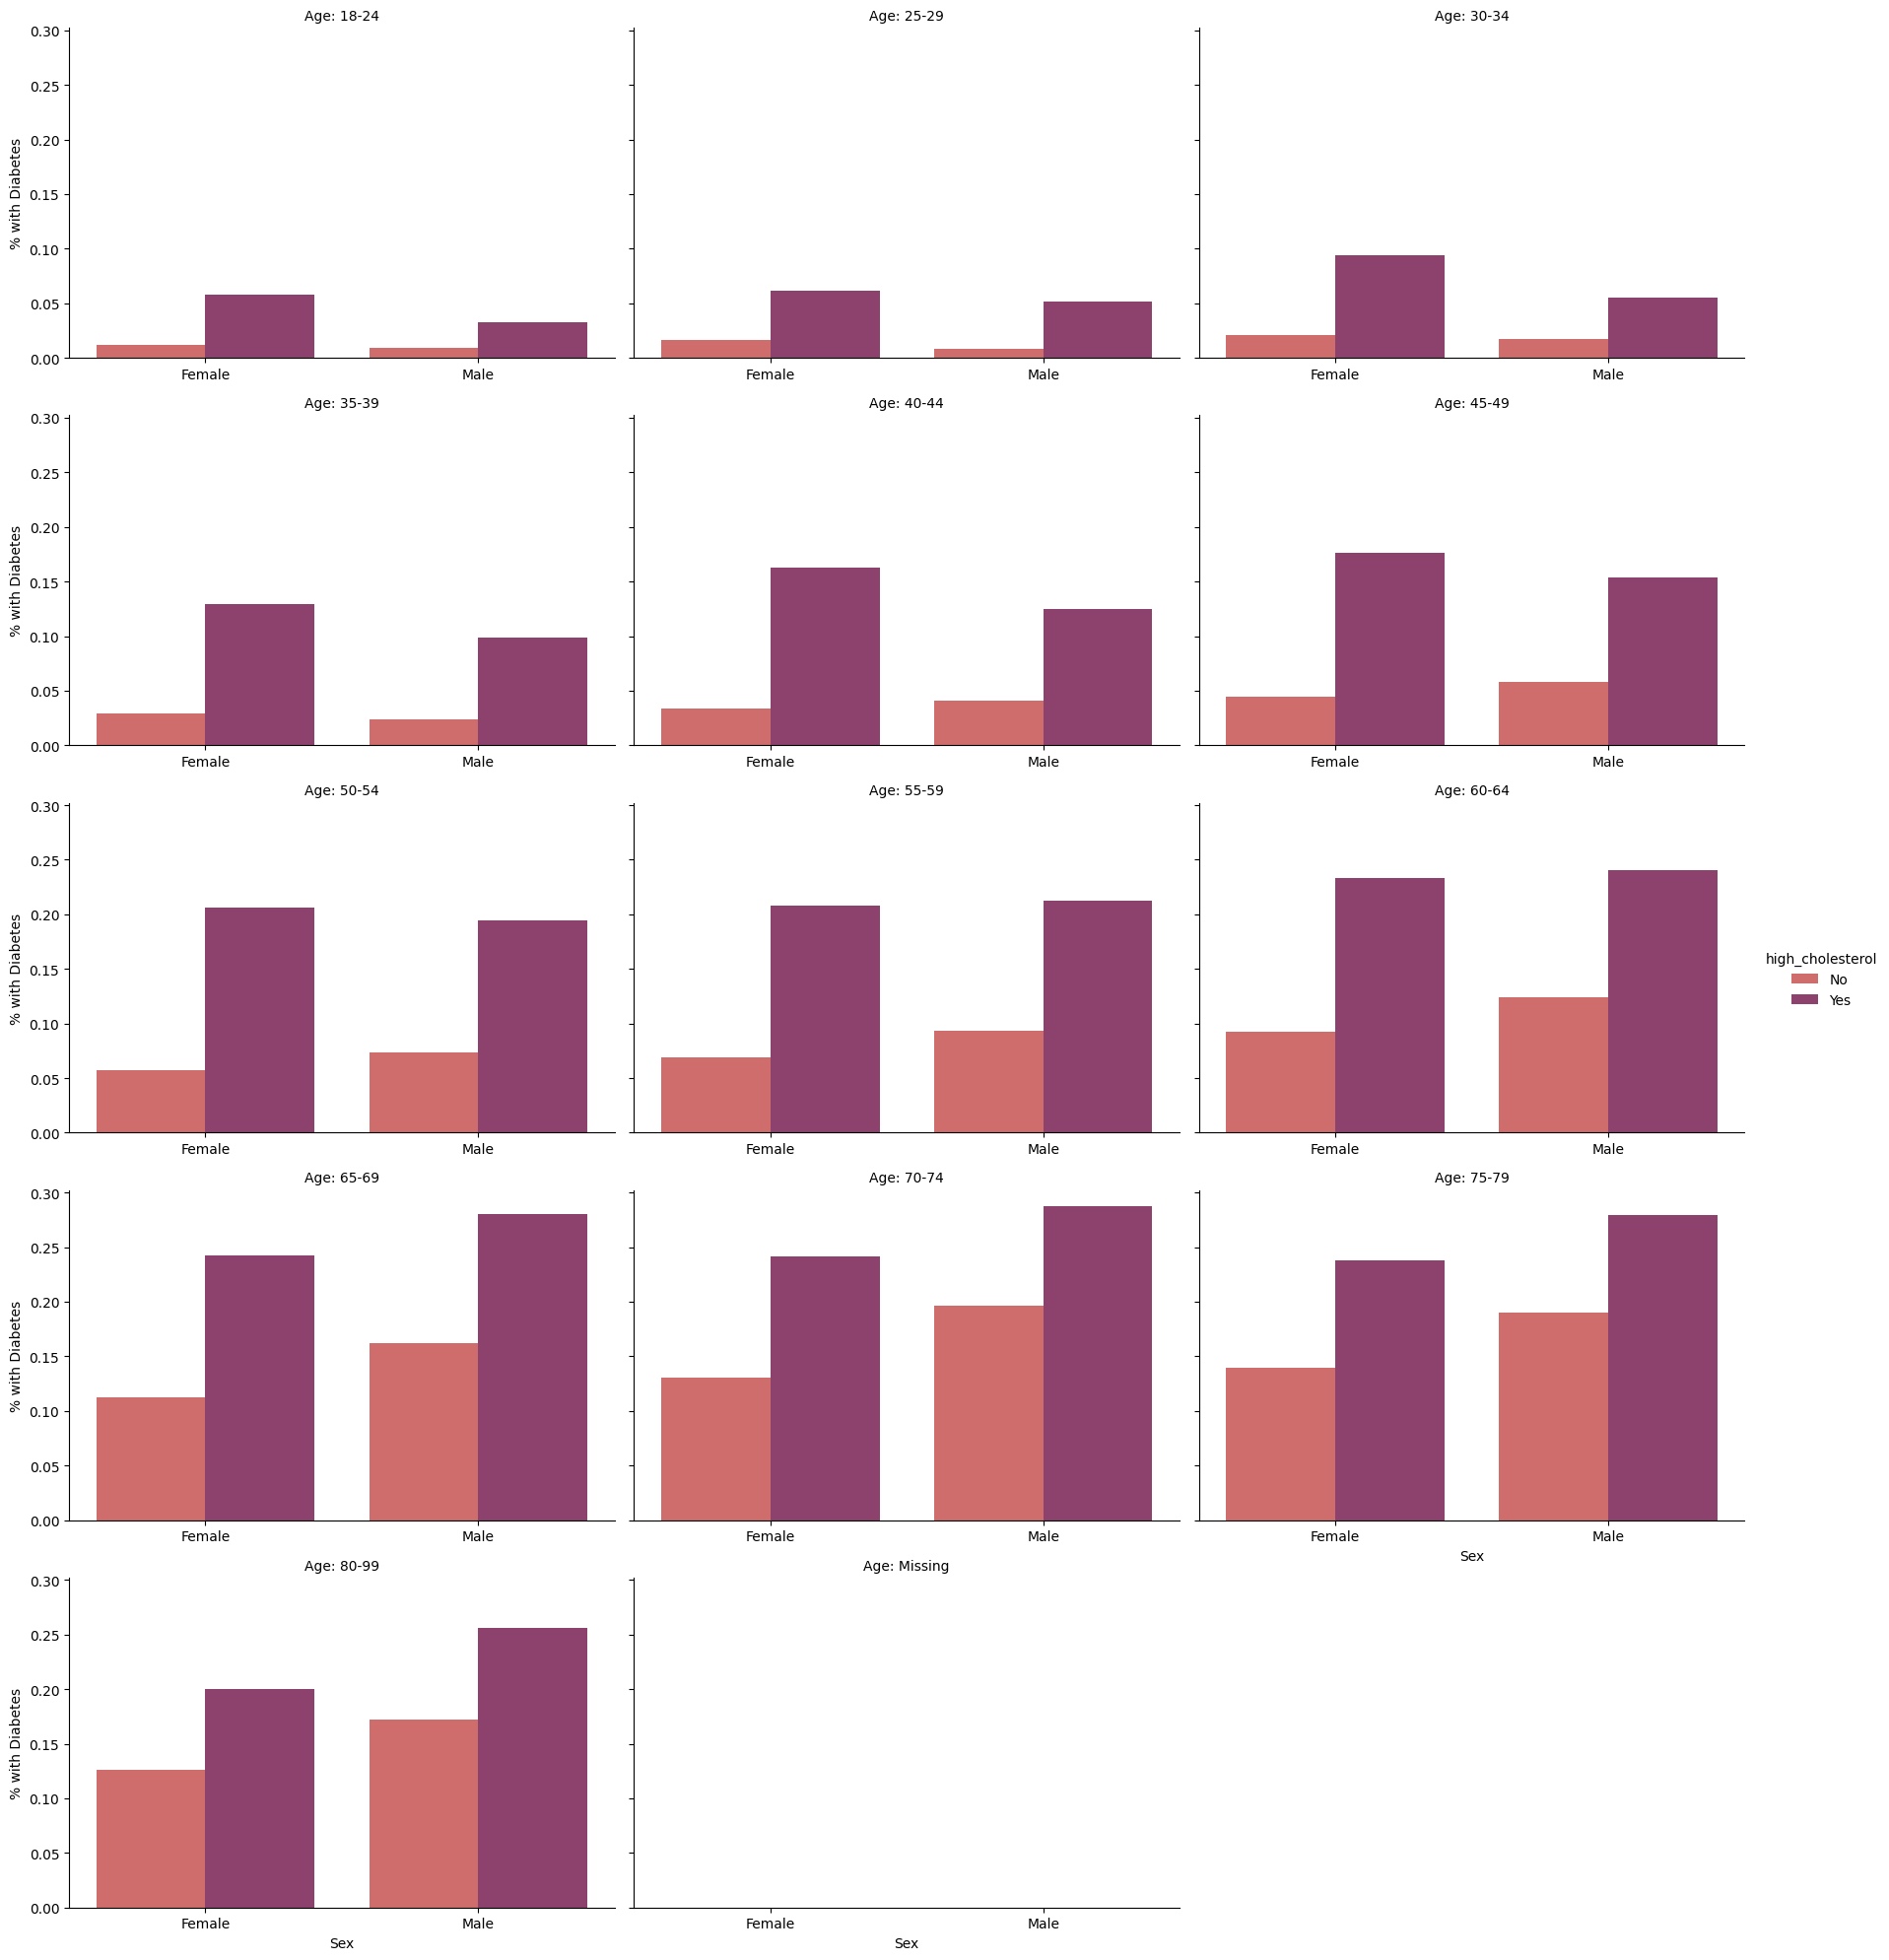

In [223]:
#Create sns.catplot() using age|high_cholesterol|sex|diabetes_binary
g = sns.catplot(
        x= 'sex', 
        y='diabetes_binary', 
        data=db_age_highch_sex,
        hue='high_cholesterol',
        sharex=False,
        #sharey=False, #Including this parameter better shows the length of the error bars for further investigation, but can be misleading due to varied y-axis values
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='age',
        col_wrap=3
)


g.set_titles(template='Age: {col_name}')
g.set_ylabels(label='% with Diabetes')
g.set_xlabels(label='Sex'); 

In [224]:
#Subset cleaned_db_data for: age, difficulty walking, diabetes binary, physical activity

db_age_dw_pa = clean_db_data[['diabetes_binary', 'age', 'difficulty_walking', 'physical_activity']].groupby(['age', 'difficulty_walking', 'physical_activity' ]).sum('diabetes_binary')

db_age_dw_pa = db_age_dw_pa.reset_index()

db_age_dw_pa

,age,difficulty_walking,physical_activity,diabetes_binary
0,18-24,No,No,12.0
1,18-24,No,Yes,59.0
2,18-24,Yes,No,3.0
3,18-24,Yes,Yes,4.0
4,25-29,No,No,30.0
5,25-29,No,Yes,86.0
6,25-29,Yes,No,9.0
7,25-29,Yes,Yes,15.0
8,30-34,No,No,58.0
9,30-34,No,Yes,205.0


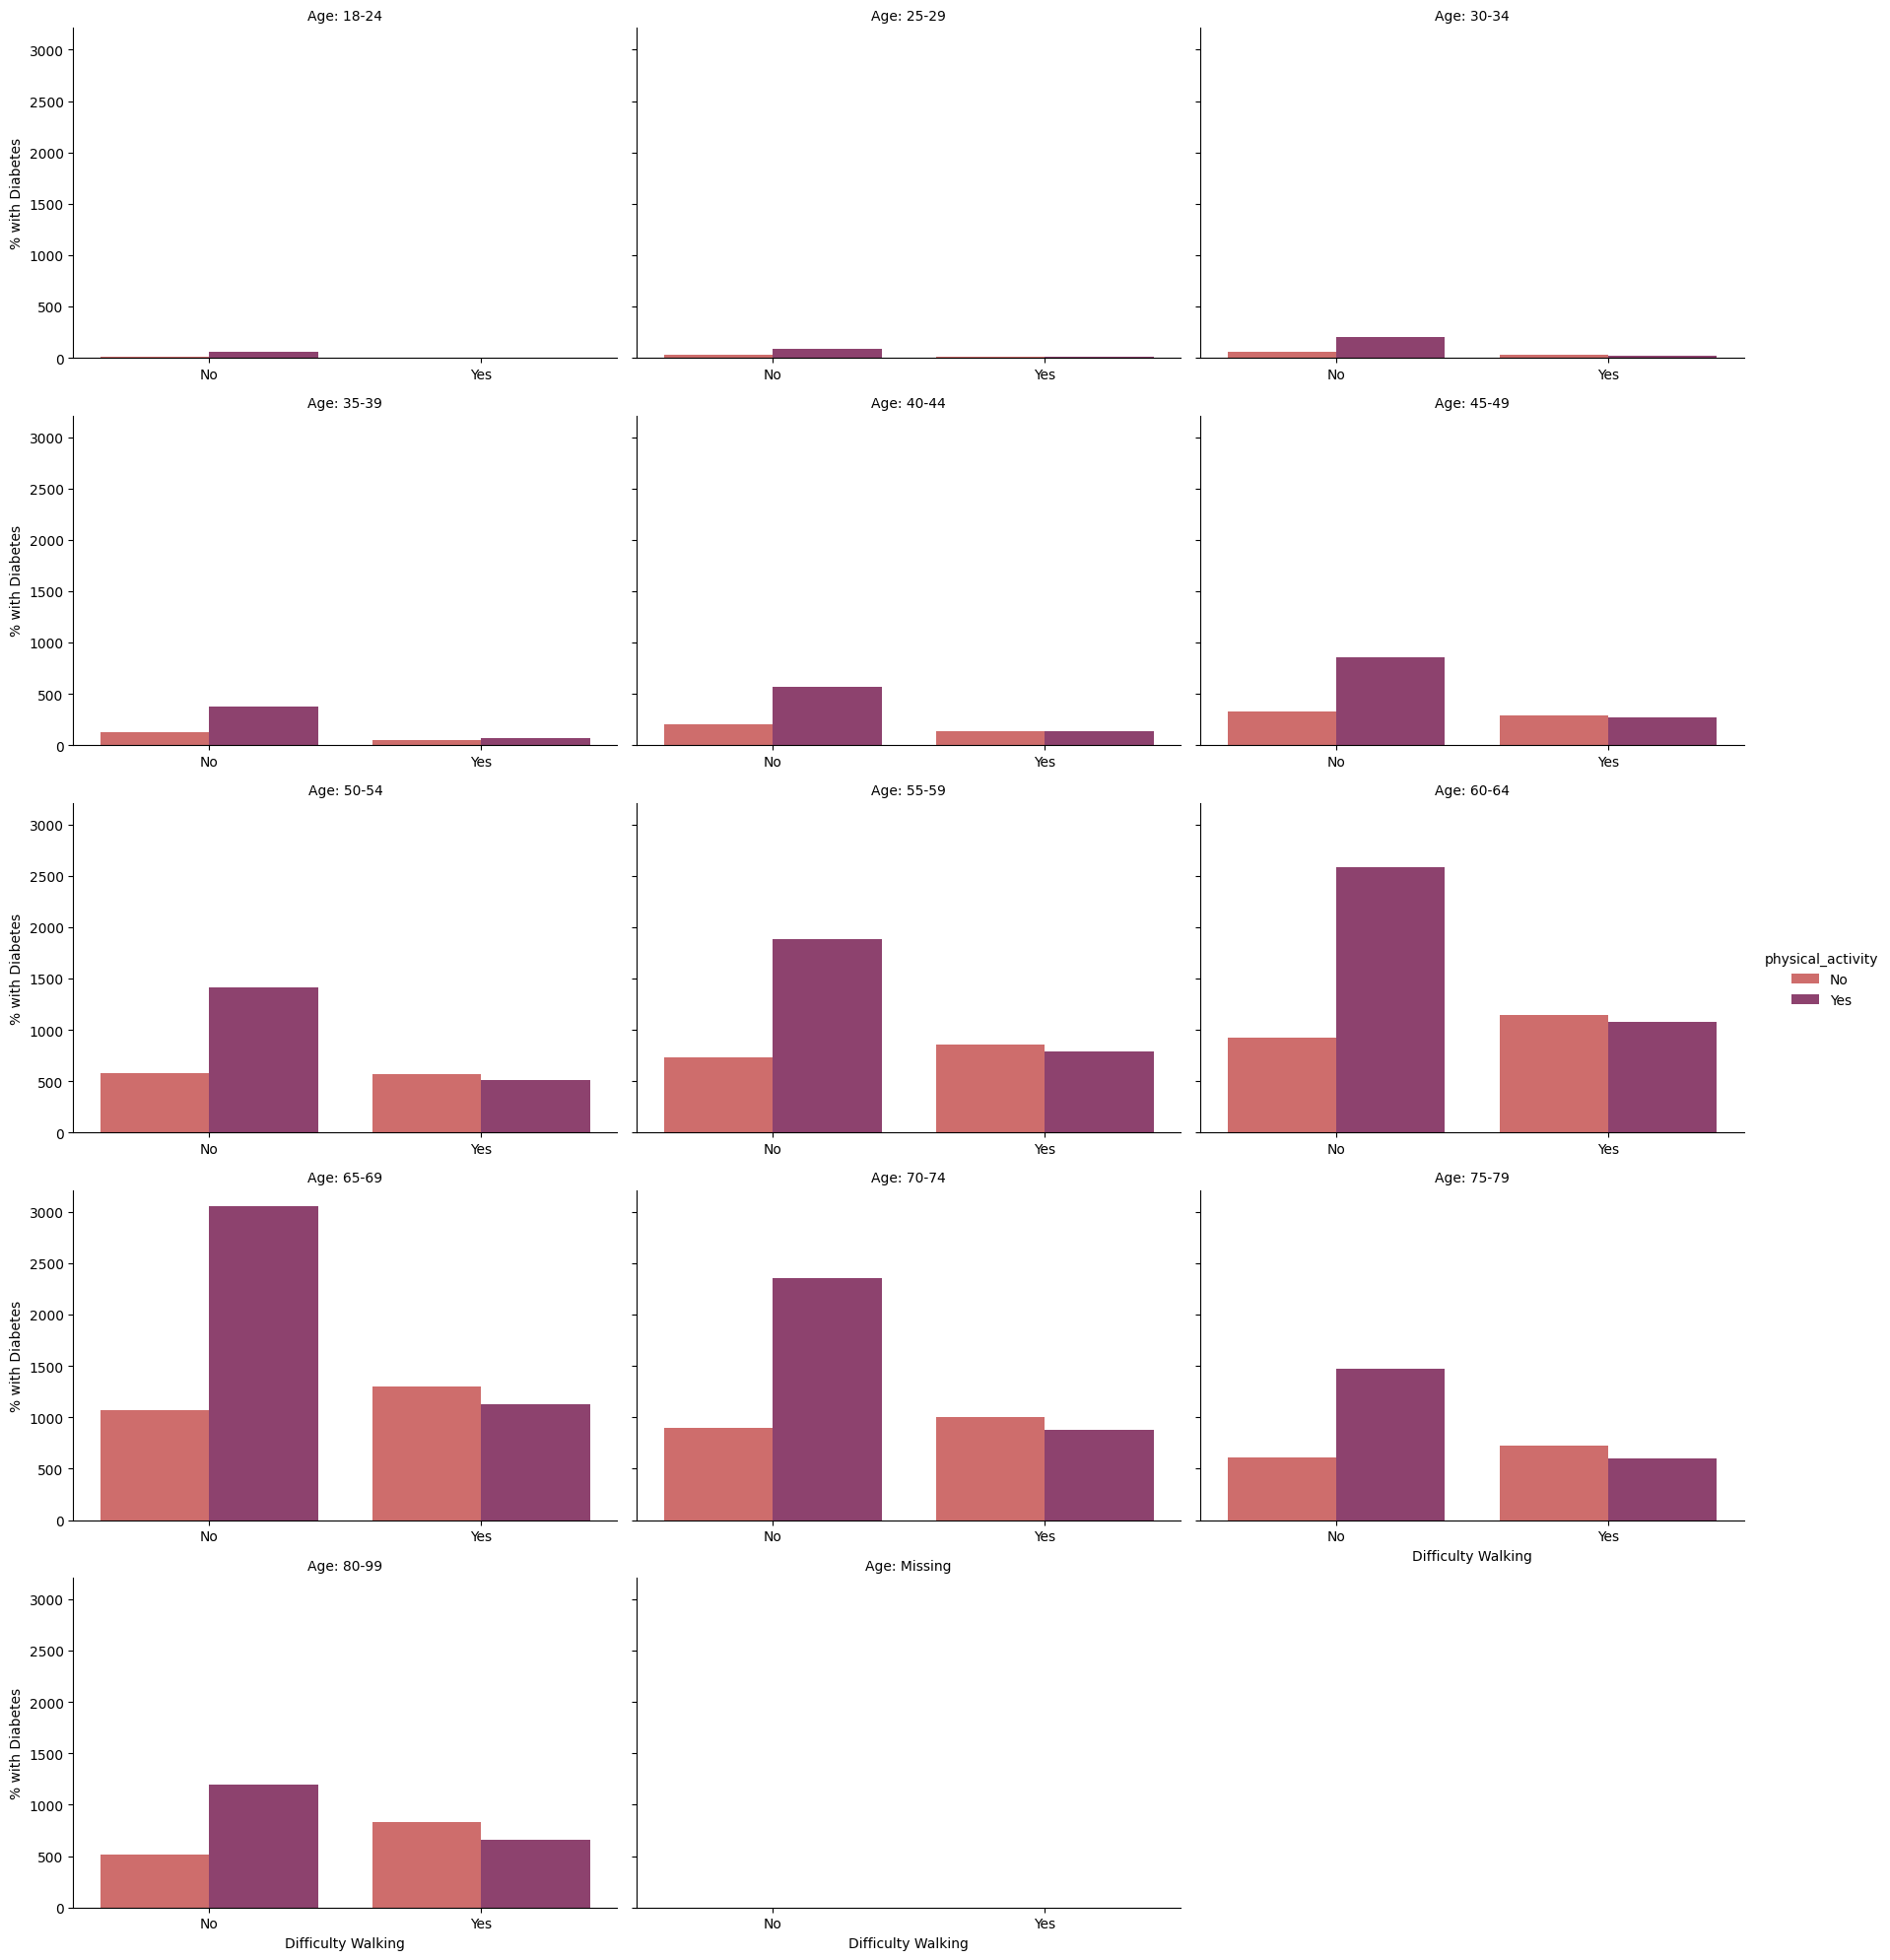

In [225]:
#Create sns.catplot() using age|difficulty walking|physical activity|diabetes_binary
g = sns.catplot(
        x= 'difficulty_walking', 
        y='diabetes_binary', 
        data=db_age_dw_pa,
        hue='physical_activity',
        sharex=False,
        #sharey=False, #Including this parameter better shows the length of the error bars for further investigation, but can be misleading due to varied y-axis values
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='age',
        col_wrap=3
)


g.set_titles(template='Age: {col_name}')
g.set_ylabels(label='% with Diabetes')
g.set_xlabels(label='Difficulty Walking'); 

In [226]:
#Subset cleaned_db_data for: age, smoker, diabetes binary, heart disease

db_age_sm_hd = clean_db_data[['diabetes_binary', 'age', 'smoker', 'heart_disease_or_attack']].groupby(['age', 'smoker', 'heart_disease_or_attack' ]).sum('diabetes_binary')

db_age_sm_hd = db_age_sm_hd.reset_index()

db_age_sm_hd

,age,smoker,heart_disease_or_attack,diabetes_binary
0,18-24,No,No,56.0
1,18-24,No,Yes,0.0
2,18-24,Yes,No,19.0
3,18-24,Yes,Yes,3.0
4,25-29,No,No,83.0
5,25-29,No,Yes,1.0
6,25-29,Yes,No,49.0
7,25-29,Yes,Yes,7.0
8,30-34,No,No,176.0
9,30-34,No,Yes,5.0


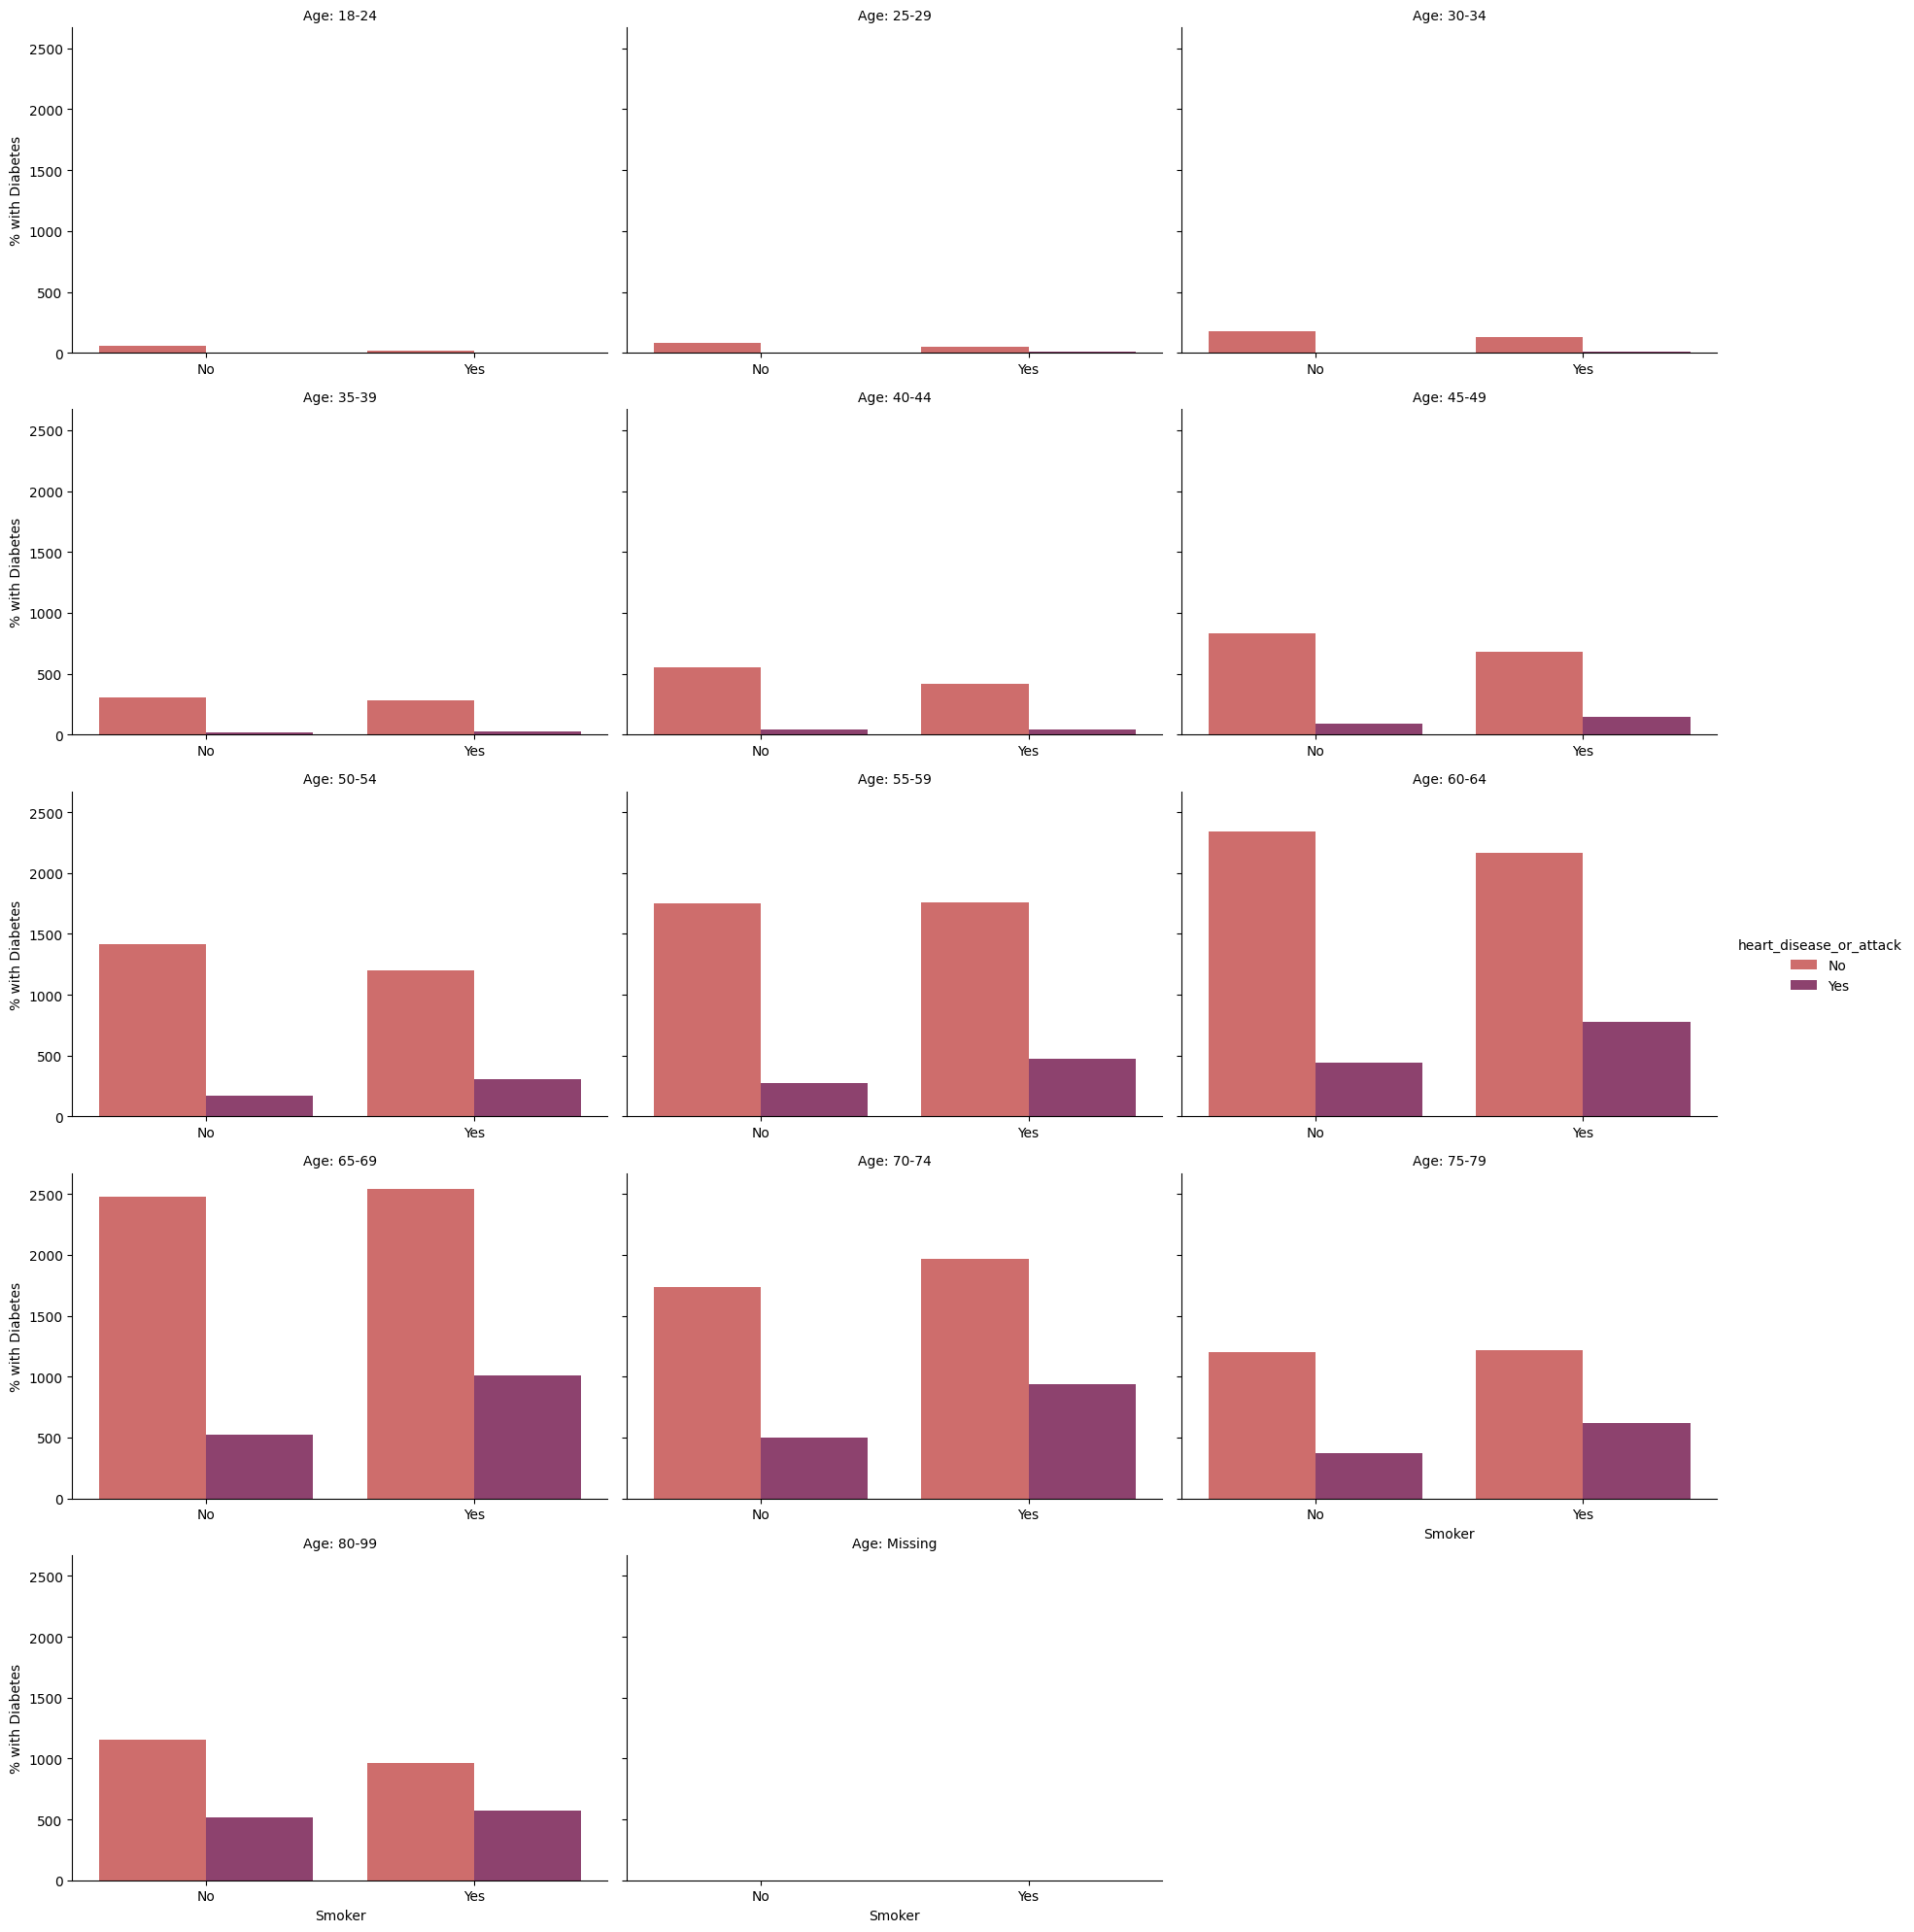

In [227]:
#Create sns.catplot() using age, smoker, diabetes binary, heart disease
g = sns.catplot(
        x= 'smoker', 
        y='diabetes_binary', 
        data=db_age_sm_hd,
        hue='heart_disease_or_attack',
        sharex=False,
        #sharey=False, #Including this parameter better shows the length of the error bars for further investigation, but can be misleading due to varied y-axis values
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='age',
        col_wrap=3
)


g.set_titles(template='Age: {col_name}')
g.set_ylabels(label='% with Diabetes')
g.set_xlabels(label='Smoker'); 

## **Answer to data question 4. What amount of those with diabetes have combined risk factors with more predictiveness/correlation?** 

- On all accounts in which age categories were individually analyzed, it showed a positive relationship/correlation to the comparative metric (high blood pressure and cholesterol). When smoker vs heart disease was compared across age categories for those with diabetes, the relationship was not as expected. There was a more moderate correlation between those having said "yes" to both metrics, as well as have diabetes. Whereas for those that did not have either in each age category we see a less consistent positive relationship to age.

## **Summary of Cross-Correlation Analysis:**

The main predictive factors determined through this part of the analysis were age, high blood pressure, and high cholesterol. These metrics also showed direct/positive relationships when analyzed on the multivariate level. Metrics which showed less correlation were BMI, smoker, physical activity, and difficulty. Surprisingly, health measures relating to diet, such as fruits and veggies, did not have as much correlation to those with diabetes as other predictive measures. 

# **Data Enrichment**

The main point of enriching the data would be to have the participant medical data that provides measure of the metrics asked about in the survey. As the data stands, we are using subjective binary results to analyze predicitiveness of diabetes indicators. This is a great starting point, but to ensure more confidence in the results, we should cross reference the participant answers with numerical health measures to evaluate accuracy of the participants' answers. This way, we could then further investigate data-supported predictiveness of the risk factors from the analysis. 

# **Recommendations:**

1. **Specify what constitutes "High" health measures:** As the majority of the data relies on binary results, one recommendation is to include how these categories are determined. What is high cholesterol? What if a participant was only just out of range of the healthy measure of cholesterol and is now considered to have high cholesterol along with one that may have severely high cholesterol. These measures should be better specified for participants. 
2. **Include more granularity in the physical activity metric:** This metric results in a yes or no, but the question asks if the participant has done physical activity in the past 30 days. This can skew the data, with those saying yes not having a way to assign how many days of physical activity they had. Furthermore, specificity may be required to establish what length of time or types of activities constitutes physical activity.
3. **More granularity needed with smoker metric:** Similarly, this metric needed to also have more parameters regarding what constitutes being a smoker. As it stands, the "yes" result is from the participant having smoked at least 100 cigarettes in their life. But this does not take into account in the time frame in which the person smoked. I would recommend establishing a time limit like "In the past 10 years" that is more medically significant.
4. **Distinguish between non-diabetic, prediabetic, and diabetic using separate columns:** This may be the most important recommendation, but the metric which this entire analysis is based needs adjustment to better determine what is actually predicitve of those with diabetes. As of now, the metric for diabetes binary groups those who are prediabetic and diabetic. This could be largely skewing the data as these conditions are not interchangeable. As it is, this data may not be credible enough to establish predictiveness of diabetes indicators.

# **Summary + Conclusions:**

The goal in this analysis was to explore some of the following research questions (which will be later discussed when going over conclusions):

1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes?
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?

The datasets used to perform this analysis were, 
- demographic_data: Includes demographic data about patients such as sex, age, education, and income. 
- enriched_data: Includes extra data such as physical health and smoker metrics
- health_measures: Included relevant health measures per person, though mostly binary results
- id_label: Added diabetes_binary per person

To conduct the analysis, the datasets were merged into one, and then data cleaning steps were performed. This included dropping certain columns due to lack of statistical significance, renaming columns, and cleaning column values from 0/1 to "No"/"Yes" respectively. Columns were also converted into the correct data types. After data cleaning steps were complete, the analysis began.

First, a univariate analysis was performed on each of the columns. Several columns stood out as possible top predictors by their distributions. These were age, high blood pressure, high cholesterol, and BMI. These variables showed less variance between either the binary results, and peaked at higher than the healthy bmi upper limit of 25. This prompted further analysis of these variables, though, to see what other variables may still have moderate predictiveness or correlation, each was compared to diabetes_binary in the bivariate and multivariate explorations. 

The next step to the analysis was to investigate predictiveness of the variables against diabetes_binary. Each metric was compared using the mean diabetes binary as this would give the percent of those in that category/result who have diabetes. Then a count of those with diabetes was taken as well to compare the subset of people and how much of the data they accounted for. When taking into account both the percentage with diabetes and the counts with diabetes, we can get a better picture of predictive measures. The 3 metrics consistently showing strong correlation to those with diabetes were age, high blood pressure, and high cholesterol. This was further supported as a positive relationship was observed between the 3 metrics in the multivariate analysis. As age increased, so did those with high blood pressure, and high cholesterol with diabetes. 

## **Conclusions:**

1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes?
- No. If we are specifically trying to determine whether an individual has diabetes, there is not a way to determine this very definitively. The metric provided combined those that were prediabetic and those with diabetes. While we could begin to show predictiveness, we could not say with enough confidence that the predictiveness is valid as to whether an individual has diabetes.

2. What risk factors are most predictive of diabetes risk?
- Age, high blood pressure, and high cholesterol are the most predictive factors of risk of diabetes. This was supported through the bivariate and multivariate analysis in which there is a positive relationship between age and diabetes, and higher counts of those with diabetes who had high blood pressure and high cholesterol vs those who did not have high blood pressure or high cholesterol. 

3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
- No. The subset of risk factors that could possibly be helpful in accurately predicting diabetes are: age, high blood pressure, high cholesterol, physical activity, difficulty walking, and smoker. Though, as mentioned, since the metric for diabetes_binary combines prediabetic and diabetic people, we can not say with certainty that these are exclusive predictive of diabetes.

4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?
- Yes. The short form of questions to help predict if someone has diabetes or is at high risk are based on those questions from the following metrics: sex, age, education, income, bmi, smoker, heart disease, high blood pressure, high cholesterol, fruits, physical activity, and difficulty walking. While not all of these were highly predictive, they help provide enough data that has some level of predictiveness.

5. This data was not ideal for this analysis. With the metric for diabetes_binary combining those who are prediabetic or have diabetes, there is low confidence in the results of this analysis. Steps should be taken to enrich the data so the analysis could provide higher confidence and predictiveness for those with diabetes exclusively.